In [ ]:
import pandas as pd
import numpy as np
import os
from rdkit.Chem import Crippen
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors
from rdkit import Chem
import matplotlib.pyplot as plt

In [26]:
pd.read_csv("fukui/6_ligs/fukui_nbo_k777_c_b8.csv").sort_values(by="fk+", ascending=False).round(2)

,No,Atom,n,n+1,n-1,fk+,fk-,fk0
20,21,N,-0.57,-0.10,-0.57,0.47,-0.00,0.24
76,77,H,0.23,0.32,0.25,0.09,-0.01,0.04
68,69,H,0.18,0.27,0.17,0.09,0.00,0.05
66,67,H,0.20,0.28,0.18,0.08,0.01,0.05
32,33,O,-0.63,-0.58,-0.64,0.05,0.01,0.03
...,...,...,...,...,...,...,...,...
13,14,C,-0.02,-0.05,-0.02,-0.03,-0.00,-0.01
35,36,C,-0.03,-0.06,-0.04,-0.03,0.02,-0.01
19,20,C,-0.18,-0.24,-0.18,-0.05,0.00,-0.03
21,22,C,-0.20,-0.25,-0.20,-0.06,0.00,-0.03


In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
from sklearn import svm

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
resultados = {}
for item in os.popen("ls fukui/*.csv").read().split('\n')[:-1]:
    if "nbo" in item:
        if "alpha_b_un_" in item:
            resultados[item.removeprefix("fukui/fukui_nbo_").removesuffix(".csv")[:-3].replace("alpha_b_un_", "alpha_beta_unsaturated_")] = pd.read_csv(item)
        else:
            resultados[item.removeprefix("fukui/fukui_nbo_").removesuffix(".csv")[:-3]] = pd.read_csv(item)

In [49]:
rank = pd.read_csv("fukui/energias/rankeamento_geral.csv")

In [ ]:
df = pd.read_csv('fukui/flig.smi',sep=' ')
#df = df.merge(rank)
df["nbo_fk+"] = np.nan
df["nbo_fk-"] = np.nan
df["nbo_fk0"] = np.nan

In [110]:
#df.ENERGY = df.ENERGY * 627.5 * 627.5

In [ ]:
for key in list(resultados.keys()):
    try:
        index_warhead, index_df = df.query("NAME == @key").WARHEAD, df.query("NAME == @key").index[0]
        df.iloc[index_df, 3] = resultados[key].loc[index_warhead]['fk+']
        df.iloc[index_df, 4] = resultados[key].loc[index_warhead]['fk-']
        df.iloc[index_df, 5] = resultados[key].loc[index_warhead]['fk0']
    except IndexError:
        print(key)

AttributeError: 'DataFrame' object has no attribute 'WARHEAD'

In [104]:
def create_funcs():
    with open("script", "w") as f:
        lista = dir(Chem.Descriptors3D)
        lista.sort()
        for method in lista:
            if "_" not in method:
                f.write(f"def {method}(row):\n")
                string = "f'{"+ f"Chem.Descriptors3D.{method}(MolFromSmiles(row.SMILES)):.4f" + "}'"
                f.write(f"    return float({string})\n")
                f.write(f"df['{method}'] = df.apply(lambda row: {method}(row), axis=1)\n\n")
#create_funcs()

In [105]:
def MaxAbsEStateIndex(row):
    return float(f'{Chem.EState.MaxAbsEStateIndex(MolFromSmiles(row.SMILES)):.4f}')
df['MaxAbsEStateIndex'] = df.apply(lambda row: MaxAbsEStateIndex(row), axis=1)

def MaxEStateIndex(row):
    return float(f'{Chem.EState.MaxEStateIndex(MolFromSmiles(row.SMILES)):.4f}')
df['MaxEStateIndex'] = df.apply(lambda row: MaxEStateIndex(row), axis=1)

def MinAbsEStateIndex(row):
    return float(f'{Chem.EState.MinAbsEStateIndex(MolFromSmiles(row.SMILES)):.4f}')
df['MinAbsEStateIndex'] = df.apply(lambda row: MinAbsEStateIndex(row), axis=1)

def MinEStateIndex(row):
    return float(f'{Chem.EState.MinEStateIndex(MolFromSmiles(row.SMILES)):.4f}')
df['MinEStateIndex'] = df.apply(lambda row: MinEStateIndex(row), axis=1)

def BalabanJ(row):
    return float(f'{Chem.GraphDescriptors.BalabanJ(MolFromSmiles(row.SMILES)):.4f}')
df['BalabanJ'] = df.apply(lambda row: BalabanJ(row), axis=1)

def BertzCT(row):
    return float(f'{Chem.GraphDescriptors.BertzCT(MolFromSmiles(row.SMILES)):.4f}')
df['BertzCT'] = df.apply(lambda row: BertzCT(row), axis=1)

def Chi0(row):
    return float(f'{Chem.GraphDescriptors.Chi0(MolFromSmiles(row.SMILES)):.4f}')
df['Chi0'] = df.apply(lambda row: Chi0(row), axis=1)

def Chi0n(row):
    return float(f'{Chem.GraphDescriptors.Chi0n(MolFromSmiles(row.SMILES)):.4f}')
df['Chi0n'] = df.apply(lambda row: Chi0n(row), axis=1)

def Chi0v(row):
    return float(f'{Chem.GraphDescriptors.Chi0v(MolFromSmiles(row.SMILES)):.4f}')
df['Chi0v'] = df.apply(lambda row: Chi0v(row), axis=1)

def Chi1(row):
    return float(f'{Chem.GraphDescriptors.Chi1(MolFromSmiles(row.SMILES)):.4f}')
df['Chi1'] = df.apply(lambda row: Chi1(row), axis=1)

def Chi1n(row):
    return float(f'{Chem.GraphDescriptors.Chi1n(MolFromSmiles(row.SMILES)):.4f}')
df['Chi1n'] = df.apply(lambda row: Chi1n(row), axis=1)

def Chi1v(row):
    return float(f'{Chem.GraphDescriptors.Chi1v(MolFromSmiles(row.SMILES)):.4f}')
df['Chi1v'] = df.apply(lambda row: Chi1v(row), axis=1)

def Chi2n(row):
    return float(f'{Chem.GraphDescriptors.Chi2n(MolFromSmiles(row.SMILES)):.4f}')
df['Chi2n'] = df.apply(lambda row: Chi2n(row), axis=1)

def Chi2v(row):
    return float(f'{Chem.GraphDescriptors.Chi2v(MolFromSmiles(row.SMILES)):.4f}')
df['Chi2v'] = df.apply(lambda row: Chi2v(row), axis=1)

def Chi3n(row):
    return float(f'{Chem.GraphDescriptors.Chi3n(MolFromSmiles(row.SMILES)):.4f}')
df['Chi3n'] = df.apply(lambda row: Chi3n(row), axis=1)

def Chi3v(row):
    return float(f'{Chem.GraphDescriptors.Chi3v(MolFromSmiles(row.SMILES)):.4f}')
df['Chi3v'] = df.apply(lambda row: Chi3v(row), axis=1)

def Chi4n(row):
    return float(f'{Chem.GraphDescriptors.Chi4n(MolFromSmiles(row.SMILES)):.4f}')
df['Chi4n'] = df.apply(lambda row: Chi4n(row), axis=1)

def Chi4v(row):
    return float(f'{Chem.GraphDescriptors.Chi4v(MolFromSmiles(row.SMILES)):.4f}')
df['Chi4v'] = df.apply(lambda row: Chi4v(row), axis=1)

def HallKierAlpha(row):
    return float(f'{Chem.GraphDescriptors.HallKierAlpha(MolFromSmiles(row.SMILES)):.4f}')
df['HallKierAlpha'] = df.apply(lambda row: HallKierAlpha(row), axis=1)

def Ipc(row):
    return float(f'{Chem.GraphDescriptors.Ipc(MolFromSmiles(row.SMILES)):.4f}')
df['Ipc'] = df.apply(lambda row: Ipc(row), axis=1)

def Kappa1(row):
    return float(f'{Chem.GraphDescriptors.Kappa1(MolFromSmiles(row.SMILES)):.4f}')
df['Kappa1'] = df.apply(lambda row: Kappa1(row), axis=1)

def Kappa2(row):
    return float(f'{Chem.GraphDescriptors.Kappa2(MolFromSmiles(row.SMILES)):.4f}')
df['Kappa2'] = df.apply(lambda row: Kappa2(row), axis=1)

def Kappa3(row):
    return float(f'{Chem.GraphDescriptors.Kappa3(MolFromSmiles(row.SMILES)):.4f}')
df['Kappa3'] = df.apply(lambda row: Kappa3(row), axis=1)

def HallKierAlpha(row):
    return float(f'{Chem.GraphDescriptors.HallKierAlpha(MolFromSmiles(row.SMILES)):.4f}')
df['hallKierAlphas'] = df.apply(lambda row: HallKierAlpha(row), axis=1)


def LabuteASA(row):
    return float(f'{Chem.MolSurf.LabuteASA(MolFromSmiles(row.SMILES)):.4f}')
df['LabuteASA'] = df.apply(lambda row: LabuteASA(row), axis=1)

def PEOE_VSA1(row):
    return float(f'{Chem.MolSurf.PEOE_VSA1(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA1'] = df.apply(lambda row: PEOE_VSA1(row), axis=1)

def PEOE_VSA10(row):
    return float(f'{Chem.MolSurf.PEOE_VSA10(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA10'] = df.apply(lambda row: PEOE_VSA10(row), axis=1)

def PEOE_VSA11(row):
    return float(f'{Chem.MolSurf.PEOE_VSA11(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA11'] = df.apply(lambda row: PEOE_VSA11(row), axis=1)

def PEOE_VSA12(row):
    return float(f'{Chem.MolSurf.PEOE_VSA12(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA12'] = df.apply(lambda row: PEOE_VSA12(row), axis=1)

def PEOE_VSA13(row):
    return float(f'{Chem.MolSurf.PEOE_VSA13(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA13'] = df.apply(lambda row: PEOE_VSA13(row), axis=1)

def PEOE_VSA14(row):
    return float(f'{Chem.MolSurf.PEOE_VSA14(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA14'] = df.apply(lambda row: PEOE_VSA14(row), axis=1)

def PEOE_VSA2(row):
    return float(f'{Chem.MolSurf.PEOE_VSA2(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA2'] = df.apply(lambda row: PEOE_VSA2(row), axis=1)

def PEOE_VSA3(row):
    return float(f'{Chem.MolSurf.PEOE_VSA3(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA3'] = df.apply(lambda row: PEOE_VSA3(row), axis=1)

def PEOE_VSA4(row):
    return float(f'{Chem.MolSurf.PEOE_VSA4(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA4'] = df.apply(lambda row: PEOE_VSA4(row), axis=1)

def PEOE_VSA5(row):
    return float(f'{Chem.MolSurf.PEOE_VSA5(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA5'] = df.apply(lambda row: PEOE_VSA5(row), axis=1)

def PEOE_VSA6(row):
    return float(f'{Chem.MolSurf.PEOE_VSA6(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA6'] = df.apply(lambda row: PEOE_VSA6(row), axis=1)

def PEOE_VSA7(row):
    return float(f'{Chem.MolSurf.PEOE_VSA7(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA7'] = df.apply(lambda row: PEOE_VSA7(row), axis=1)

def PEOE_VSA8(row):
    return float(f'{Chem.MolSurf.PEOE_VSA8(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA8'] = df.apply(lambda row: PEOE_VSA8(row), axis=1)

def PEOE_VSA9(row):
    return float(f'{Chem.MolSurf.PEOE_VSA9(MolFromSmiles(row.SMILES)):.4f}')
df['PEOE_VSA9'] = df.apply(lambda row: PEOE_VSA9(row), axis=1)

def SMR_VSA1(row):
    return float(f'{Chem.MolSurf.SMR_VSA1(MolFromSmiles(row.SMILES)):.4f}')
df['SMR_VSA1'] = df.apply(lambda row: SMR_VSA1(row), axis=1)

def SMR_VSA10(row):
    return float(f'{Chem.MolSurf.SMR_VSA10(MolFromSmiles(row.SMILES)):.4f}')
df['SMR_VSA10'] = df.apply(lambda row: SMR_VSA10(row), axis=1)

def SMR_VSA2(row):
    return float(f'{Chem.MolSurf.SMR_VSA2(MolFromSmiles(row.SMILES)):.4f}')
df['SMR_VSA2'] = df.apply(lambda row: SMR_VSA2(row), axis=1)

def SMR_VSA3(row):
    return float(f'{Chem.MolSurf.SMR_VSA3(MolFromSmiles(row.SMILES)):.4f}')
df['SMR_VSA3'] = df.apply(lambda row: SMR_VSA3(row), axis=1)

def SMR_VSA4(row):
    return float(f'{Chem.MolSurf.SMR_VSA4(MolFromSmiles(row.SMILES)):.4f}')
df['SMR_VSA4'] = df.apply(lambda row: SMR_VSA4(row), axis=1)

def SMR_VSA5(row):
    return float(f'{Chem.MolSurf.SMR_VSA5(MolFromSmiles(row.SMILES)):.4f}')
df['SMR_VSA5'] = df.apply(lambda row: SMR_VSA5(row), axis=1)

def SMR_VSA6(row):
    return float(f'{Chem.MolSurf.SMR_VSA6(MolFromSmiles(row.SMILES)):.4f}')
df['SMR_VSA6'] = df.apply(lambda row: SMR_VSA6(row), axis=1)

def SMR_VSA7(row):
    return float(f'{Chem.MolSurf.SMR_VSA7(MolFromSmiles(row.SMILES)):.4f}')
df['SMR_VSA7'] = df.apply(lambda row: SMR_VSA7(row), axis=1)

def SMR_VSA8(row):
    return float(f'{Chem.MolSurf.SMR_VSA8(MolFromSmiles(row.SMILES)):.4f}')
df['SMR_VSA8'] = df.apply(lambda row: SMR_VSA8(row), axis=1)

def SMR_VSA9(row):
    return float(f'{Chem.MolSurf.SMR_VSA9(MolFromSmiles(row.SMILES)):.4f}')
df['SMR_VSA9'] = df.apply(lambda row: SMR_VSA9(row), axis=1)

def SlogP_VSA1(row):
    return float(f'{Chem.MolSurf.SlogP_VSA1(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA1'] = df.apply(lambda row: SlogP_VSA1(row), axis=1)

def SlogP_VSA10(row):
    return float(f'{Chem.MolSurf.SlogP_VSA10(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA10'] = df.apply(lambda row: SlogP_VSA10(row), axis=1)

def SlogP_VSA11(row):
    return float(f'{Chem.MolSurf.SlogP_VSA11(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA11'] = df.apply(lambda row: SlogP_VSA11(row), axis=1)

def SlogP_VSA12(row):
    return float(f'{Chem.MolSurf.SlogP_VSA12(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA12'] = df.apply(lambda row: SlogP_VSA12(row), axis=1)

def SlogP_VSA2(row):
    return float(f'{Chem.MolSurf.SlogP_VSA2(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA2'] = df.apply(lambda row: SlogP_VSA2(row), axis=1)

def SlogP_VSA3(row):
    return float(f'{Chem.MolSurf.SlogP_VSA3(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA3'] = df.apply(lambda row: SlogP_VSA3(row), axis=1)

def SlogP_VSA4(row):
    return float(f'{Chem.MolSurf.SlogP_VSA4(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA4'] = df.apply(lambda row: SlogP_VSA4(row), axis=1)

def SlogP_VSA5(row):
    return float(f'{Chem.MolSurf.SlogP_VSA5(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA5'] = df.apply(lambda row: SlogP_VSA5(row), axis=1)

def SlogP_VSA6(row):
    return float(f'{Chem.MolSurf.SlogP_VSA6(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA6'] = df.apply(lambda row: SlogP_VSA6(row), axis=1)

def SlogP_VSA7(row):
    return float(f'{Chem.MolSurf.SlogP_VSA7(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA7'] = df.apply(lambda row: SlogP_VSA7(row), axis=1)

def SlogP_VSA8(row):
    return float(f'{Chem.MolSurf.SlogP_VSA8(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA8'] = df.apply(lambda row: SlogP_VSA8(row), axis=1)

def SlogP_VSA9(row):
    return float(f'{Chem.MolSurf.SlogP_VSA9(MolFromSmiles(row.SMILES)):.4f}')
df['SlogP_VSA9'] = df.apply(lambda row: SlogP_VSA9(row), axis=1)


def fr_Al_COO(row):
    return float(f'{Chem.Fragments.fr_Al_COO(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Al_COO'] = df.apply(lambda row: fr_Al_COO(row), axis=1)

def fr_Al_OH(row):
    return float(f'{Chem.Fragments.fr_Al_OH(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Al_OH'] = df.apply(lambda row: fr_Al_OH(row), axis=1)

def fr_Al_OH_noTert(row):
    return float(f'{Chem.Fragments.fr_Al_OH_noTert(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Al_OH_noTert'] = df.apply(lambda row: fr_Al_OH_noTert(row), axis=1)

def fr_ArN(row):
    return float(f'{Chem.Fragments.fr_ArN(MolFromSmiles(row.SMILES)):.4f}')
df['fr_ArN'] = df.apply(lambda row: fr_ArN(row), axis=1)

def fr_Ar_COO(row):
    return float(f'{Chem.Fragments.fr_Ar_COO(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Ar_COO'] = df.apply(lambda row: fr_Ar_COO(row), axis=1)

def fr_Ar_N(row):
    return float(f'{Chem.Fragments.fr_Ar_N(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Ar_N'] = df.apply(lambda row: fr_Ar_N(row), axis=1)

def fr_Ar_NH(row):
    return float(f'{Chem.Fragments.fr_Ar_NH(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Ar_NH'] = df.apply(lambda row: fr_Ar_NH(row), axis=1)

def fr_Ar_OH(row):
    return float(f'{Chem.Fragments.fr_Ar_OH(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Ar_OH'] = df.apply(lambda row: fr_Ar_OH(row), axis=1)

def fr_COO(row):
    return float(f'{Chem.Fragments.fr_COO(MolFromSmiles(row.SMILES)):.4f}')
df['fr_COO'] = df.apply(lambda row: fr_COO(row), axis=1)

def fr_COO2(row):
    return float(f'{Chem.Fragments.fr_COO2(MolFromSmiles(row.SMILES)):.4f}')
df['fr_COO2'] = df.apply(lambda row: fr_COO2(row), axis=1)

def fr_C_O(row):
    return float(f'{Chem.Fragments.fr_C_O(MolFromSmiles(row.SMILES)):.4f}')
df['fr_C_O'] = df.apply(lambda row: fr_C_O(row), axis=1)

def fr_C_O_noCOO(row):
    return float(f'{Chem.Fragments.fr_C_O_noCOO(MolFromSmiles(row.SMILES)):.4f}')
df['fr_C_O_noCOO'] = df.apply(lambda row: fr_C_O_noCOO(row), axis=1)

def fr_C_S(row):
    return float(f'{Chem.Fragments.fr_C_S(MolFromSmiles(row.SMILES)):.4f}')
df['fr_C_S'] = df.apply(lambda row: fr_C_S(row), axis=1)

def fr_HOCCN(row):
    return float(f'{Chem.Fragments.fr_HOCCN(MolFromSmiles(row.SMILES)):.4f}')
df['fr_HOCCN'] = df.apply(lambda row: fr_HOCCN(row), axis=1)

def fr_Imine(row):
    return float(f'{Chem.Fragments.fr_Imine(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Imine'] = df.apply(lambda row: fr_Imine(row), axis=1)

def fr_NH0(row):
    return float(f'{Chem.Fragments.fr_NH0(MolFromSmiles(row.SMILES)):.4f}')
df['fr_NH0'] = df.apply(lambda row: fr_NH0(row), axis=1)

def fr_NH1(row):
    return float(f'{Chem.Fragments.fr_NH1(MolFromSmiles(row.SMILES)):.4f}')
df['fr_NH1'] = df.apply(lambda row: fr_NH1(row), axis=1)

def fr_NH2(row):
    return float(f'{Chem.Fragments.fr_NH2(MolFromSmiles(row.SMILES)):.4f}')
df['fr_NH2'] = df.apply(lambda row: fr_NH2(row), axis=1)

def fr_N_O(row):
    return float(f'{Chem.Fragments.fr_N_O(MolFromSmiles(row.SMILES)):.4f}')
df['fr_N_O'] = df.apply(lambda row: fr_N_O(row), axis=1)

def fr_Ndealkylation1(row):
    return float(f'{Chem.Fragments.fr_Ndealkylation1(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Ndealkylation1'] = df.apply(lambda row: fr_Ndealkylation1(row), axis=1)

def fr_Ndealkylation2(row):
    return float(f'{Chem.Fragments.fr_Ndealkylation2(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Ndealkylation2'] = df.apply(lambda row: fr_Ndealkylation2(row), axis=1)

def fr_Nhpyrrole(row):
    return float(f'{Chem.Fragments.fr_Nhpyrrole(MolFromSmiles(row.SMILES)):.4f}')
df['fr_Nhpyrrole'] = df.apply(lambda row: fr_Nhpyrrole(row), axis=1)

def fr_SH(row):
    return float(f'{Chem.Fragments.fr_SH(MolFromSmiles(row.SMILES)):.4f}')
df['fr_SH'] = df.apply(lambda row: fr_SH(row), axis=1)

def fr_aldehyde(row):
    return float(f'{Chem.Fragments.fr_aldehyde(MolFromSmiles(row.SMILES)):.4f}')
df['fr_aldehyde'] = df.apply(lambda row: fr_aldehyde(row), axis=1)

def fr_alkyl_carbamate(row):
    return float(f'{Chem.Fragments.fr_alkyl_carbamate(MolFromSmiles(row.SMILES)):.4f}')
df['fr_alkyl_carbamate'] = df.apply(lambda row: fr_alkyl_carbamate(row), axis=1)

def fr_alkyl_halide(row):
    return float(f'{Chem.Fragments.fr_alkyl_halide(MolFromSmiles(row.SMILES)):.4f}')
df['fr_alkyl_halide'] = df.apply(lambda row: fr_alkyl_halide(row), axis=1)

def fr_allylic_oxid(row):
    return float(f'{Chem.Fragments.fr_allylic_oxid(MolFromSmiles(row.SMILES)):.4f}')
df['fr_allylic_oxid'] = df.apply(lambda row: fr_allylic_oxid(row), axis=1)

def fr_amide(row):
    return float(f'{Chem.Fragments.fr_amide(MolFromSmiles(row.SMILES)):.4f}')
df['fr_amide'] = df.apply(lambda row: fr_amide(row), axis=1)

def fr_amidine(row):
    return float(f'{Chem.Fragments.fr_amidine(MolFromSmiles(row.SMILES)):.4f}')
df['fr_amidine'] = df.apply(lambda row: fr_amidine(row), axis=1)

def fr_aniline(row):
    return float(f'{Chem.Fragments.fr_aniline(MolFromSmiles(row.SMILES)):.4f}')
df['fr_aniline'] = df.apply(lambda row: fr_aniline(row), axis=1)

def fr_aryl_methyl(row):
    return float(f'{Chem.Fragments.fr_aryl_methyl(MolFromSmiles(row.SMILES)):.4f}')
df['fr_aryl_methyl'] = df.apply(lambda row: fr_aryl_methyl(row), axis=1)

def fr_azide(row):
    return float(f'{Chem.Fragments.fr_azide(MolFromSmiles(row.SMILES)):.4f}')
df['fr_azide'] = df.apply(lambda row: fr_azide(row), axis=1)

def fr_azo(row):
    return float(f'{Chem.Fragments.fr_azo(MolFromSmiles(row.SMILES)):.4f}')
df['fr_azo'] = df.apply(lambda row: fr_azo(row), axis=1)

def fr_barbitur(row):
    return float(f'{Chem.Fragments.fr_barbitur(MolFromSmiles(row.SMILES)):.4f}')
df['fr_barbitur'] = df.apply(lambda row: fr_barbitur(row), axis=1)

def fr_benzene(row):
    return float(f'{Chem.Fragments.fr_benzene(MolFromSmiles(row.SMILES)):.4f}')
df['fr_benzene'] = df.apply(lambda row: fr_benzene(row), axis=1)

def fr_benzodiazepine(row):
    return float(f'{Chem.Fragments.fr_benzodiazepine(MolFromSmiles(row.SMILES)):.4f}')
df['fr_benzodiazepine'] = df.apply(lambda row: fr_benzodiazepine(row), axis=1)

def fr_bicyclic(row):
    return float(f'{Chem.Fragments.fr_bicyclic(MolFromSmiles(row.SMILES)):.4f}')
df['fr_bicyclic'] = df.apply(lambda row: fr_bicyclic(row), axis=1)

def fr_diazo(row):
    return float(f'{Chem.Fragments.fr_diazo(MolFromSmiles(row.SMILES)):.4f}')
df['fr_diazo'] = df.apply(lambda row: fr_diazo(row), axis=1)

def fr_dihydropyridine(row):
    return float(f'{Chem.Fragments.fr_dihydropyridine(MolFromSmiles(row.SMILES)):.4f}')
df['fr_dihydropyridine'] = df.apply(lambda row: fr_dihydropyridine(row), axis=1)

def fr_epoxide(row):
    return float(f'{Chem.Fragments.fr_epoxide(MolFromSmiles(row.SMILES)):.4f}')
df['fr_epoxide'] = df.apply(lambda row: fr_epoxide(row), axis=1)

def fr_ester(row):
    return float(f'{Chem.Fragments.fr_ester(MolFromSmiles(row.SMILES)):.4f}')
df['fr_ester'] = df.apply(lambda row: fr_ester(row), axis=1)

def fr_ether(row):
    return float(f'{Chem.Fragments.fr_ether(MolFromSmiles(row.SMILES)):.4f}')
df['fr_ether'] = df.apply(lambda row: fr_ether(row), axis=1)

def fr_furan(row):
    return float(f'{Chem.Fragments.fr_furan(MolFromSmiles(row.SMILES)):.4f}')
df['fr_furan'] = df.apply(lambda row: fr_furan(row), axis=1)

def fr_guanido(row):
    return float(f'{Chem.Fragments.fr_guanido(MolFromSmiles(row.SMILES)):.4f}')
df['fr_guanido'] = df.apply(lambda row: fr_guanido(row), axis=1)

def fr_halogen(row):
    return float(f'{Chem.Fragments.fr_halogen(MolFromSmiles(row.SMILES)):.4f}')
df['fr_halogen'] = df.apply(lambda row: fr_halogen(row), axis=1)

def fr_hdrzine(row):
    return float(f'{Chem.Fragments.fr_hdrzine(MolFromSmiles(row.SMILES)):.4f}')
df['fr_hdrzine'] = df.apply(lambda row: fr_hdrzine(row), axis=1)

def fr_hdrzone(row):
    return float(f'{Chem.Fragments.fr_hdrzone(MolFromSmiles(row.SMILES)):.4f}')
df['fr_hdrzone'] = df.apply(lambda row: fr_hdrzone(row), axis=1)

def fr_imidazole(row):
    return float(f'{Chem.Fragments.fr_imidazole(MolFromSmiles(row.SMILES)):.4f}')
df['fr_imidazole'] = df.apply(lambda row: fr_imidazole(row), axis=1)

def fr_imide(row):
    return float(f'{Chem.Fragments.fr_imide(MolFromSmiles(row.SMILES)):.4f}')
df['fr_imide'] = df.apply(lambda row: fr_imide(row), axis=1)

def fr_isocyan(row):
    return float(f'{Chem.Fragments.fr_isocyan(MolFromSmiles(row.SMILES)):.4f}')
df['fr_isocyan'] = df.apply(lambda row: fr_isocyan(row), axis=1)

def fr_isothiocyan(row):
    return float(f'{Chem.Fragments.fr_isothiocyan(MolFromSmiles(row.SMILES)):.4f}')
df['fr_isothiocyan'] = df.apply(lambda row: fr_isothiocyan(row), axis=1)

def fr_ketone(row):
    return float(f'{Chem.Fragments.fr_ketone(MolFromSmiles(row.SMILES)):.4f}')
df['fr_ketone'] = df.apply(lambda row: fr_ketone(row), axis=1)

def fr_ketone_Topliss(row):
    return float(f'{Chem.Fragments.fr_ketone_Topliss(MolFromSmiles(row.SMILES)):.4f}')
df['fr_ketone_Topliss'] = df.apply(lambda row: fr_ketone_Topliss(row), axis=1)

def fr_lactam(row):
    return float(f'{Chem.Fragments.fr_lactam(MolFromSmiles(row.SMILES)):.4f}')
df['fr_lactam'] = df.apply(lambda row: fr_lactam(row), axis=1)

def fr_lactone(row):
    return float(f'{Chem.Fragments.fr_lactone(MolFromSmiles(row.SMILES)):.4f}')
df['fr_lactone'] = df.apply(lambda row: fr_lactone(row), axis=1)

def fr_methoxy(row):
    return float(f'{Chem.Fragments.fr_methoxy(MolFromSmiles(row.SMILES)):.4f}')
df['fr_methoxy'] = df.apply(lambda row: fr_methoxy(row), axis=1)

def fr_morpholine(row):
    return float(f'{Chem.Fragments.fr_morpholine(MolFromSmiles(row.SMILES)):.4f}')
df['fr_morpholine'] = df.apply(lambda row: fr_morpholine(row), axis=1)

def fr_nitrile(row):
    return float(f'{Chem.Fragments.fr_nitrile(MolFromSmiles(row.SMILES)):.4f}')
df['fr_nitrile'] = df.apply(lambda row: fr_nitrile(row), axis=1)

def fr_nitro(row):
    return float(f'{Chem.Fragments.fr_nitro(MolFromSmiles(row.SMILES)):.4f}')
df['fr_nitro'] = df.apply(lambda row: fr_nitro(row), axis=1)

def fr_nitro_arom(row):
    return float(f'{Chem.Fragments.fr_nitro_arom(MolFromSmiles(row.SMILES)):.4f}')
df['fr_nitro_arom'] = df.apply(lambda row: fr_nitro_arom(row), axis=1)

def fr_nitro_arom_nonortho(row):
    return float(f'{Chem.Fragments.fr_nitro_arom_nonortho(MolFromSmiles(row.SMILES)):.4f}')
df['fr_nitro_arom_nonortho'] = df.apply(lambda row: fr_nitro_arom_nonortho(row), axis=1)

def fr_nitroso(row):
    return float(f'{Chem.Fragments.fr_nitroso(MolFromSmiles(row.SMILES)):.4f}')
df['fr_nitroso'] = df.apply(lambda row: fr_nitroso(row), axis=1)

def fr_oxazole(row):
    return float(f'{Chem.Fragments.fr_oxazole(MolFromSmiles(row.SMILES)):.4f}')
df['fr_oxazole'] = df.apply(lambda row: fr_oxazole(row), axis=1)

def fr_oxime(row):
    return float(f'{Chem.Fragments.fr_oxime(MolFromSmiles(row.SMILES)):.4f}')
df['fr_oxime'] = df.apply(lambda row: fr_oxime(row), axis=1)

def fr_para_hydroxylation(row):
    return float(f'{Chem.Fragments.fr_para_hydroxylation(MolFromSmiles(row.SMILES)):.4f}')
df['fr_para_hydroxylation'] = df.apply(lambda row: fr_para_hydroxylation(row), axis=1)

def fr_phenol(row):
    return float(f'{Chem.Fragments.fr_phenol(MolFromSmiles(row.SMILES)):.4f}')
df['fr_phenol'] = df.apply(lambda row: fr_phenol(row), axis=1)

def fr_phenol_noOrthoHbond(row):
    return float(f'{Chem.Fragments.fr_phenol_noOrthoHbond(MolFromSmiles(row.SMILES)):.4f}')
df['fr_phenol_noOrthoHbond'] = df.apply(lambda row: fr_phenol_noOrthoHbond(row), axis=1)

def fr_phos_acid(row):
    return float(f'{Chem.Fragments.fr_phos_acid(MolFromSmiles(row.SMILES)):.4f}')
df['fr_phos_acid'] = df.apply(lambda row: fr_phos_acid(row), axis=1)

def fr_phos_ester(row):
    return float(f'{Chem.Fragments.fr_phos_ester(MolFromSmiles(row.SMILES)):.4f}')
df['fr_phos_ester'] = df.apply(lambda row: fr_phos_ester(row), axis=1)

def fr_piperdine(row):
    return float(f'{Chem.Fragments.fr_piperdine(MolFromSmiles(row.SMILES)):.4f}')
df['fr_piperdine'] = df.apply(lambda row: fr_piperdine(row), axis=1)

def fr_piperzine(row):
    return float(f'{Chem.Fragments.fr_piperzine(MolFromSmiles(row.SMILES)):.4f}')
df['fr_piperzine'] = df.apply(lambda row: fr_piperzine(row), axis=1)

def fr_priamide(row):
    return float(f'{Chem.Fragments.fr_priamide(MolFromSmiles(row.SMILES)):.4f}')
df['fr_priamide'] = df.apply(lambda row: fr_priamide(row), axis=1)

def fr_prisulfonamd(row):
    return float(f'{Chem.Fragments.fr_prisulfonamd(MolFromSmiles(row.SMILES)):.4f}')
df['fr_prisulfonamd'] = df.apply(lambda row: fr_prisulfonamd(row), axis=1)

def fr_pyridine(row):
    return float(f'{Chem.Fragments.fr_pyridine(MolFromSmiles(row.SMILES)):.4f}')
df['fr_pyridine'] = df.apply(lambda row: fr_pyridine(row), axis=1)

def fr_quatN(row):
    return float(f'{Chem.Fragments.fr_quatN(MolFromSmiles(row.SMILES)):.4f}')
df['fr_quatN'] = df.apply(lambda row: fr_quatN(row), axis=1)

def fr_sulfide(row):
    return float(f'{Chem.Fragments.fr_sulfide(MolFromSmiles(row.SMILES)):.4f}')
df['fr_sulfide'] = df.apply(lambda row: fr_sulfide(row), axis=1)

def fr_sulfonamd(row):
    return float(f'{Chem.Fragments.fr_sulfonamd(MolFromSmiles(row.SMILES)):.4f}')
df['fr_sulfonamd'] = df.apply(lambda row: fr_sulfonamd(row), axis=1)

def fr_sulfone(row):
    return float(f'{Chem.Fragments.fr_sulfone(MolFromSmiles(row.SMILES)):.4f}')
df['fr_sulfone'] = df.apply(lambda row: fr_sulfone(row), axis=1)

def fr_term_acetylene(row):
    return float(f'{Chem.Fragments.fr_term_acetylene(MolFromSmiles(row.SMILES)):.4f}')
df['fr_term_acetylene'] = df.apply(lambda row: fr_term_acetylene(row), axis=1)

def fr_tetrazole(row):
    return float(f'{Chem.Fragments.fr_tetrazole(MolFromSmiles(row.SMILES)):.4f}')
df['fr_tetrazole'] = df.apply(lambda row: fr_tetrazole(row), axis=1)

def fr_thiazole(row):
    return float(f'{Chem.Fragments.fr_thiazole(MolFromSmiles(row.SMILES)):.4f}')
df['fr_thiazole'] = df.apply(lambda row: fr_thiazole(row), axis=1)

def fr_thiocyan(row):
    return float(f'{Chem.Fragments.fr_thiocyan(MolFromSmiles(row.SMILES)):.4f}')
df['fr_thiocyan'] = df.apply(lambda row: fr_thiocyan(row), axis=1)

def fr_thiophene(row):
    return float(f'{Chem.Fragments.fr_thiophene(MolFromSmiles(row.SMILES)):.4f}')
df['fr_thiophene'] = df.apply(lambda row: fr_thiophene(row), axis=1)

def fr_unbrch_alkane(row):
    return float(f'{Chem.Fragments.fr_unbrch_alkane(MolFromSmiles(row.SMILES)):.4f}')
df['fr_unbrch_alkane'] = df.apply(lambda row: fr_unbrch_alkane(row), axis=1)

def fr_urea(row):
    return float(f'{Chem.Fragments.fr_urea(MolFromSmiles(row.SMILES)):.4f}')
df['fr_urea'] = df.apply(lambda row: fr_urea(row), axis=1)

def lin_NumHDonors(row):
    return float(f"{Lipinski.NumHDonors(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumHDonors'] = df.apply(lambda row: lin_NumHDonors(row), axis=1)

def lin_NumHAcceptors(row):
    return float(f"{Lipinski.NumHAcceptors(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumHAcceptors'] = df.apply(lambda row: lin_NumHAcceptors(row), axis=1)

def lin_FractionCSP3(row):
    return float(f"{Lipinski.FractionCSP3(MolFromSmiles(row.SMILES)):.4f}")
df['lin_FractionCSP3'] = df.apply(lambda row: lin_FractionCSP3(row), axis=1)

def lin_HeavyAtomCount(row):
    return float(f"{Lipinski.HeavyAtomCount(MolFromSmiles(row.SMILES)):.4f}")
df['lin_HeavyAtomCount'] = df.apply(lambda row: lin_HeavyAtomCount(row), axis=1)

def lin_NHOHCount(row):
    return float(f"{Lipinski.NHOHCount(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NHOHCount'] = df.apply(lambda row: lin_NHOHCount(row), axis=1)

def lin_NOCount(row):
    return float(f"{Lipinski.NOCount(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NOCount'] = df.apply(lambda row: lin_NOCount(row), axis=1)

def lin_NumAliphaticCarbocycles(row):
    return float(f"{Lipinski.NumAliphaticCarbocycles(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumAliphaticCarbocycles'] = df.apply(lambda row: lin_NumAliphaticCarbocycles(row), axis=1)

def lin_NumAliphaticHeterocycles(row):
    return float(f"{Lipinski.NumAliphaticHeterocycles(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumAliphaticHeterocycles'] = df.apply(lambda row: lin_NumAliphaticHeterocycles(row), axis=1)

def lin_NumAliphaticRings(row):
    return float(f"{Lipinski.NumAliphaticRings(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumAliphaticRings'] = df.apply(lambda row: lin_NumAliphaticRings(row), axis=1)

def lin_NumAromaticCarbocycles(row):
    return float(f"{Lipinski.NumAromaticCarbocycles(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumAromaticCarbocycles'] = df.apply(lambda row: lin_NumAromaticCarbocycles(row), axis=1)

def lin_NumAromaticHeterocycles(row):
    return float(f"{Lipinski.NumAromaticHeterocycles(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumAromaticHeterocycles'] = df.apply(lambda row: lin_NumAromaticHeterocycles(row), axis=1)

def lin_NumHeteroatoms(row):
    return float(f"{Lipinski.NumHeteroatoms(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumHeteroatoms'] = df.apply(lambda row: lin_NumHeteroatoms(row), axis=1)

def lin_NumSaturatedCarbocycles(row):
    return float(f"{Lipinski.NumSaturatedCarbocycles(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumSaturatedCarbocycles'] = df.apply(lambda row: lin_NumSaturatedCarbocycles(row), axis=1)

def lin_NumSaturatedHeterocycles(row):
    return float(f"{Lipinski.NumSaturatedHeterocycles(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumSaturatedHeterocycles'] = df.apply(lambda row: lin_NumSaturatedHeterocycles(row), axis=1)

def lin_NumSaturatedRings(row):
    return float(f"{Lipinski.NumSaturatedRings(MolFromSmiles(row.SMILES)):.4f}")
df['lin_NumSaturatedRings'] = df.apply(lambda row: lin_NumSaturatedRings(row), axis=1)

def lin_RingCount(row):
    return float(f"{Lipinski.RingCount(MolFromSmiles(row.SMILES)):.4f}")
df['lin_RingCount'] = df.apply(lambda row: lin_RingCount(row), axis=1)

def MolWt(row):
    return float(f"{Descriptors.MolWt(MolFromSmiles(row.SMILES)):.4f}")
df['molwt'] = df.apply(lambda row: MolWt(row), axis=1)

def MolMR(row):
    return float(f"{Crippen.MolMR(MolFromSmiles(row.SMILES)):.4f}")
df['MolMR'] = df.apply(lambda row: MolMR(row), axis=1)

def MaxAbsPartialCharge(row):
    return float(f"{Descriptors.MaxAbsPartialCharge(MolFromSmiles(row.SMILES)):.4f}")
df['MaxAbsPartialCharge'] = df.apply(lambda row: MaxAbsPartialCharge(row), axis=1)

def NumRadicalElectrons(row):
    return float(f"{Descriptors.NumRadicalElectrons(MolFromSmiles(row.SMILES)):.4f}")
df['NumRadicalElectrons'] = df.apply(lambda row: NumRadicalElectrons(row), axis=1)

def MinPartialCharge(row):
    return float(f"{Descriptors.MinPartialCharge(MolFromSmiles(row.SMILES)):.4f}")
df['MinPartialCharge'] = df.apply(lambda row: MinPartialCharge(row), axis=1)

def ExactMolWt(row):
    return float(f"{Descriptors.ExactMolWt(MolFromSmiles(row.SMILES)):.4f}")
df['ExactMolWt'] = df.apply(lambda row: ExactMolWt(row), axis=1)

def NumValenceElectrons(row):
    return float(f"{Descriptors.NumValenceElectrons(MolFromSmiles(row.SMILES)):.4f}")
df['NumValenceElectrons'] = df.apply(lambda row: NumValenceElectrons(row), axis=1)

def HeavyAtomMolWt(row):
    return float(f"{Descriptors.HeavyAtomMolWt(MolFromSmiles(row.SMILES)):.4f}")
df['HeavyAtomMolWt'] = df.apply(lambda row: HeavyAtomMolWt(row), axis=1)

def FpDensityMorgan1(row):
    return float(f"{Descriptors.FpDensityMorgan1(MolFromSmiles(row.SMILES)):.4f}")
df['FpDensityMorgan1'] = df.apply(lambda row: FpDensityMorgan1(row), axis=1)

def FpDensityMorgan2(row):
    return float(f"{Descriptors.FpDensityMorgan2(MolFromSmiles(row.SMILES)):.4f}")
df['FpDensityMorgan2'] = df.apply(lambda row: FpDensityMorgan2(row), axis=1)

def FpDensityMorgan3(row):
    return float(f"{Descriptors.FpDensityMorgan3(MolFromSmiles(row.SMILES)):.4f}")
df['FpDensityMorgan3'] = df.apply(lambda row: FpDensityMorgan3(row), axis=1)

def MolLogP(row):
    return float(f"{Crippen.MolLogP(MolFromSmiles(row.SMILES)):.4f}")
df['MolLogP'] = df.apply(lambda row: MolLogP(row), axis=1)

def GetSSSR(row):
    return float(f"{Chem.GetSSSR(MolFromSmiles(row.SMILES)):.4f}")
df['aromatic_ring'] = df.apply(lambda row: GetSSSR(row), axis=1)

def TPSA(row):
    return float(f"{Chem.MolSurf.TPSA(MolFromSmiles(row.SMILES)):.2f}")
df['TPSA'] = df.apply(lambda row: TPSA(row), axis=1)

def GetNumHeavyAtoms(row):
    return float(f"{(MolFromSmiles(row.SMILES)).GetNumHeavyAtoms():.1f}")
df['NumHeavyAtoms'] = df.apply(lambda row: GetNumHeavyAtoms(row), axis=1)

def qed(row):
    return float(f"{Chem.QED.qed(MolFromSmiles(row.SMILES)):.2f}")
df['qed'] = df.apply(lambda row: qed(row), axis=1)

In [106]:
def calcula_all_pro(df):
    df['MaxAbsEStateIndex'] = df.apply(lambda row: MaxAbsEStateIndex(row), axis=1)
    df['MaxEStateIndex'] = df.apply(lambda row: MaxEStateIndex(row), axis=1)
    df['MinAbsEStateIndex'] = df.apply(lambda row: MinAbsEStateIndex(row), axis=1)
    df['MinEStateIndex'] = df.apply(lambda row: MinEStateIndex(row), axis=1)
    df['BalabanJ'] = df.apply(lambda row: BalabanJ(row), axis=1)
    df['BertzCT'] = df.apply(lambda row: BertzCT(row), axis=1)
    df['Chi0'] = df.apply(lambda row: Chi0(row), axis=1)
    df['Chi0n'] = df.apply(lambda row: Chi0n(row), axis=1)
    df['Chi0v'] = df.apply(lambda row: Chi0v(row), axis=1)
    df['Chi1'] = df.apply(lambda row: Chi1(row), axis=1)
    df['Chi1n'] = df.apply(lambda row: Chi1n(row), axis=1)
    df['Chi1v'] = df.apply(lambda row: Chi1v(row), axis=1)
    df['Chi2n'] = df.apply(lambda row: Chi2n(row), axis=1)
    df['Chi2v'] = df.apply(lambda row: Chi2v(row), axis=1)
    df['Chi3n'] = df.apply(lambda row: Chi3n(row), axis=1)
    df['Chi3v'] = df.apply(lambda row: Chi3v(row), axis=1)
    df['Chi4n'] = df.apply(lambda row: Chi4n(row), axis=1)
    df['Chi4v'] = df.apply(lambda row: Chi4v(row), axis=1)
    df['HallKierAlpha'] = df.apply(lambda row: HallKierAlpha(row), axis=1)
    df['Ipc'] = df.apply(lambda row: Ipc(row), axis=1)
    df['Kappa1'] = df.apply(lambda row: Kappa1(row), axis=1)
    df['Kappa2'] = df.apply(lambda row: Kappa2(row), axis=1)
    df['Kappa3'] = df.apply(lambda row: Kappa3(row), axis=1)
    df['hallKierAlphas'] = df.apply(lambda row: HallKierAlpha(row), axis=1)
    df['LabuteASA'] = df.apply(lambda row: LabuteASA(row), axis=1)
    df['PEOE_VSA1'] = df.apply(lambda row: PEOE_VSA1(row), axis=1)
    df['PEOE_VSA10'] = df.apply(lambda row: PEOE_VSA10(row), axis=1)
    df['PEOE_VSA11'] = df.apply(lambda row: PEOE_VSA11(row), axis=1)
    df['PEOE_VSA12'] = df.apply(lambda row: PEOE_VSA12(row), axis=1)
    df['PEOE_VSA13'] = df.apply(lambda row: PEOE_VSA13(row), axis=1)
    df['PEOE_VSA14'] = df.apply(lambda row: PEOE_VSA14(row), axis=1)
    df['PEOE_VSA2'] = df.apply(lambda row: PEOE_VSA2(row), axis=1)
    df['PEOE_VSA3'] = df.apply(lambda row: PEOE_VSA3(row), axis=1)
    df['PEOE_VSA4'] = df.apply(lambda row: PEOE_VSA4(row), axis=1)
    df['PEOE_VSA5'] = df.apply(lambda row: PEOE_VSA5(row), axis=1)
    df['PEOE_VSA6'] = df.apply(lambda row: PEOE_VSA6(row), axis=1)
    df['PEOE_VSA7'] = df.apply(lambda row: PEOE_VSA7(row), axis=1)
    df['PEOE_VSA8'] = df.apply(lambda row: PEOE_VSA8(row), axis=1)
    df['PEOE_VSA9'] = df.apply(lambda row: PEOE_VSA9(row), axis=1)
    df['SMR_VSA1'] = df.apply(lambda row: SMR_VSA1(row), axis=1)
    df['SMR_VSA10'] = df.apply(lambda row: SMR_VSA10(row), axis=1)
    df['SMR_VSA2'] = df.apply(lambda row: SMR_VSA2(row), axis=1)
    df['SMR_VSA3'] = df.apply(lambda row: SMR_VSA3(row), axis=1)
    df['SMR_VSA4'] = df.apply(lambda row: SMR_VSA4(row), axis=1)
    df['SMR_VSA5'] = df.apply(lambda row: SMR_VSA5(row), axis=1)
    df['SMR_VSA6'] = df.apply(lambda row: SMR_VSA6(row), axis=1)
    df['SMR_VSA7'] = df.apply(lambda row: SMR_VSA7(row), axis=1)
    df['SMR_VSA8'] = df.apply(lambda row: SMR_VSA8(row), axis=1)
    df['SMR_VSA9'] = df.apply(lambda row: SMR_VSA9(row), axis=1)
    df['SlogP_VSA1'] = df.apply(lambda row: SlogP_VSA1(row), axis=1)
    df['SlogP_VSA10'] = df.apply(lambda row: SlogP_VSA10(row), axis=1)
    df['SlogP_VSA11'] = df.apply(lambda row: SlogP_VSA11(row), axis=1)
    df['SlogP_VSA12'] = df.apply(lambda row: SlogP_VSA12(row), axis=1)
    df['SlogP_VSA2'] = df.apply(lambda row: SlogP_VSA2(row), axis=1)
    df['SlogP_VSA3'] = df.apply(lambda row: SlogP_VSA3(row), axis=1)
    df['SlogP_VSA4'] = df.apply(lambda row: SlogP_VSA4(row), axis=1)
    df['SlogP_VSA5'] = df.apply(lambda row: SlogP_VSA5(row), axis=1)
    df['SlogP_VSA6'] = df.apply(lambda row: SlogP_VSA6(row), axis=1)
    df['SlogP_VSA7'] = df.apply(lambda row: SlogP_VSA7(row), axis=1)
    df['SlogP_VSA8'] = df.apply(lambda row: SlogP_VSA8(row), axis=1)
    df['SlogP_VSA9'] = df.apply(lambda row: SlogP_VSA9(row), axis=1)
    df['fr_Al_COO'] = df.apply(lambda row: fr_Al_COO(row), axis=1)
    df['fr_Al_OH'] = df.apply(lambda row: fr_Al_OH(row), axis=1)
    df['fr_Al_OH_noTert'] = df.apply(lambda row: fr_Al_OH_noTert(row), axis=1)
    df['fr_ArN'] = df.apply(lambda row: fr_ArN(row), axis=1)
    df['fr_Ar_COO'] = df.apply(lambda row: fr_Ar_COO(row), axis=1)
    df['fr_Ar_N'] = df.apply(lambda row: fr_Ar_N(row), axis=1)
    df['fr_Ar_NH'] = df.apply(lambda row: fr_Ar_NH(row), axis=1)
    df['fr_Ar_OH'] = df.apply(lambda row: fr_Ar_OH(row), axis=1)
    df['fr_COO'] = df.apply(lambda row: fr_COO(row), axis=1)
    df['fr_COO2'] = df.apply(lambda row: fr_COO2(row), axis=1)
    df['fr_C_O'] = df.apply(lambda row: fr_C_O(row), axis=1)
    df['fr_C_O_noCOO'] = df.apply(lambda row: fr_C_O_noCOO(row), axis=1)
    df['fr_C_S'] = df.apply(lambda row: fr_C_S(row), axis=1)
    df['fr_HOCCN'] = df.apply(lambda row: fr_HOCCN(row), axis=1)
    df['fr_Imine'] = df.apply(lambda row: fr_Imine(row), axis=1)
    df['fr_NH0'] = df.apply(lambda row: fr_NH0(row), axis=1)
    df['fr_NH1'] = df.apply(lambda row: fr_NH1(row), axis=1)
    df['fr_NH2'] = df.apply(lambda row: fr_NH2(row), axis=1)
    df['fr_N_O'] = df.apply(lambda row: fr_N_O(row), axis=1)
    df['fr_Ndealkylation1'] = df.apply(lambda row: fr_Ndealkylation1(row), axis=1)
    df['fr_Ndealkylation2'] = df.apply(lambda row: fr_Ndealkylation2(row), axis=1)
    df['fr_Nhpyrrole'] = df.apply(lambda row: fr_Nhpyrrole(row), axis=1)
    df['fr_SH'] = df.apply(lambda row: fr_SH(row), axis=1)
    df['fr_aldehyde'] = df.apply(lambda row: fr_aldehyde(row), axis=1)
    df['fr_alkyl_carbamate'] = df.apply(lambda row: fr_alkyl_carbamate(row), axis=1)
    df['fr_alkyl_halide'] = df.apply(lambda row: fr_alkyl_halide(row), axis=1)
    df['fr_allylic_oxid'] = df.apply(lambda row: fr_allylic_oxid(row), axis=1)
    df['fr_amide'] = df.apply(lambda row: fr_amide(row), axis=1)
    df['fr_amidine'] = df.apply(lambda row: fr_amidine(row), axis=1)
    df['fr_aniline'] = df.apply(lambda row: fr_aniline(row), axis=1)
    df['fr_aryl_methyl'] = df.apply(lambda row: fr_aryl_methyl(row), axis=1)
    df['fr_azide'] = df.apply(lambda row: fr_azide(row), axis=1)
    df['fr_azo'] = df.apply(lambda row: fr_azo(row), axis=1)
    df['fr_barbitur'] = df.apply(lambda row: fr_barbitur(row), axis=1)
    df['fr_benzene'] = df.apply(lambda row: fr_benzene(row), axis=1)
    df['fr_benzodiazepine'] = df.apply(lambda row: fr_benzodiazepine(row), axis=1)
    df['fr_bicyclic'] = df.apply(lambda row: fr_bicyclic(row), axis=1)
    df['fr_diazo'] = df.apply(lambda row: fr_diazo(row), axis=1)
    df['fr_dihydropyridine'] = df.apply(lambda row: fr_dihydropyridine(row), axis=1)
    df['fr_epoxide'] = df.apply(lambda row: fr_epoxide(row), axis=1)
    df['fr_ester'] = df.apply(lambda row: fr_ester(row), axis=1)
    df['fr_ether'] = df.apply(lambda row: fr_ether(row), axis=1)
    df['fr_furan'] = df.apply(lambda row: fr_furan(row), axis=1)
    df['fr_guanido'] = df.apply(lambda row: fr_guanido(row), axis=1)
    df['fr_halogen'] = df.apply(lambda row: fr_halogen(row), axis=1)
    df['fr_hdrzine'] = df.apply(lambda row: fr_hdrzine(row), axis=1)
    df['fr_hdrzone'] = df.apply(lambda row: fr_hdrzone(row), axis=1)
    df['fr_imidazole'] = df.apply(lambda row: fr_imidazole(row), axis=1)
    df['fr_imide'] = df.apply(lambda row: fr_imide(row), axis=1)
    df['fr_isocyan'] = df.apply(lambda row: fr_isocyan(row), axis=1)
    df['fr_isothiocyan'] = df.apply(lambda row: fr_isothiocyan(row), axis=1)
    df['fr_ketone'] = df.apply(lambda row: fr_ketone(row), axis=1)
    df['fr_ketone_Topliss'] = df.apply(lambda row: fr_ketone_Topliss(row), axis=1)
    df['fr_lactam'] = df.apply(lambda row: fr_lactam(row), axis=1)
    df['fr_lactone'] = df.apply(lambda row: fr_lactone(row), axis=1)
    df['fr_methoxy'] = df.apply(lambda row: fr_methoxy(row), axis=1)
    df['fr_morpholine'] = df.apply(lambda row: fr_morpholine(row), axis=1)
    df['fr_nitrile'] = df.apply(lambda row: fr_nitrile(row), axis=1)
    df['fr_nitro'] = df.apply(lambda row: fr_nitro(row), axis=1)
    df['fr_nitro_arom'] = df.apply(lambda row: fr_nitro_arom(row), axis=1)
    df['fr_nitro_arom_nonortho'] = df.apply(lambda row: fr_nitro_arom_nonortho(row), axis=1)
    df['fr_nitroso'] = df.apply(lambda row: fr_nitroso(row), axis=1)
    df['fr_oxazole'] = df.apply(lambda row: fr_oxazole(row), axis=1)
    df['fr_oxime'] = df.apply(lambda row: fr_oxime(row), axis=1)
    df['fr_para_hydroxylation'] = df.apply(lambda row: fr_para_hydroxylation(row), axis=1)
    df['fr_phenol'] = df.apply(lambda row: fr_phenol(row), axis=1)
    df['fr_phenol_noOrthoHbond'] = df.apply(lambda row: fr_phenol_noOrthoHbond(row), axis=1)
    df['fr_phos_acid'] = df.apply(lambda row: fr_phos_acid(row), axis=1)
    df['fr_phos_ester'] = df.apply(lambda row: fr_phos_ester(row), axis=1)
    df['fr_piperdine'] = df.apply(lambda row: fr_piperdine(row), axis=1)
    df['fr_piperzine'] = df.apply(lambda row: fr_piperzine(row), axis=1)
    df['fr_priamide'] = df.apply(lambda row: fr_priamide(row), axis=1)
    df['fr_prisulfonamd'] = df.apply(lambda row: fr_prisulfonamd(row), axis=1)
    df['fr_pyridine'] = df.apply(lambda row: fr_pyridine(row), axis=1)
    df['fr_quatN'] = df.apply(lambda row: fr_quatN(row), axis=1)
    df['fr_sulfide'] = df.apply(lambda row: fr_sulfide(row), axis=1)
    df['fr_sulfonamd'] = df.apply(lambda row: fr_sulfonamd(row), axis=1)
    df['fr_sulfone'] = df.apply(lambda row: fr_sulfone(row), axis=1)
    df['fr_term_acetylene'] = df.apply(lambda row: fr_term_acetylene(row), axis=1)
    df['fr_tetrazole'] = df.apply(lambda row: fr_tetrazole(row), axis=1)
    df['fr_thiazole'] = df.apply(lambda row: fr_thiazole(row), axis=1)
    df['fr_thiocyan'] = df.apply(lambda row: fr_thiocyan(row), axis=1)
    df['fr_thiophene'] = df.apply(lambda row: fr_thiophene(row), axis=1)
    df['fr_unbrch_alkane'] = df.apply(lambda row: fr_unbrch_alkane(row), axis=1)
    df['fr_urea'] = df.apply(lambda row: fr_urea(row), axis=1)
    df['lin_NumHDonors'] = df.apply(lambda row: lin_NumHDonors(row), axis=1)
    df['lin_NumHAcceptors'] = df.apply(lambda row: lin_NumHAcceptors(row), axis=1)
    df['lin_FractionCSP3'] = df.apply(lambda row: lin_FractionCSP3(row), axis=1)
    df['lin_HeavyAtomCount'] = df.apply(lambda row: lin_HeavyAtomCount(row), axis=1)
    df['lin_NHOHCount'] = df.apply(lambda row: lin_NHOHCount(row), axis=1)
    df['lin_NOCount'] = df.apply(lambda row: lin_NOCount(row), axis=1)
    df['lin_NumAliphaticCarbocycles'] = df.apply(lambda row: lin_NumAliphaticCarbocycles(row), axis=1)
    df['lin_NumAliphaticHeterocycles'] = df.apply(lambda row: lin_NumAliphaticHeterocycles(row), axis=1)
    df['lin_NumAliphaticRings'] = df.apply(lambda row: lin_NumAliphaticRings(row), axis=1)
    df['lin_NumAromaticCarbocycles'] = df.apply(lambda row: lin_NumAromaticCarbocycles(row), axis=1)
    df['lin_NumAromaticHeterocycles'] = df.apply(lambda row: lin_NumAromaticHeterocycles(row), axis=1)
    df['lin_NumHeteroatoms'] = df.apply(lambda row: lin_NumHeteroatoms(row), axis=1)
    df['lin_NumSaturatedCarbocycles'] = df.apply(lambda row: lin_NumSaturatedCarbocycles(row), axis=1)
    df['lin_NumSaturatedHeterocycles'] = df.apply(lambda row: lin_NumSaturatedHeterocycles(row), axis=1)
    df['lin_NumSaturatedRings'] = df.apply(lambda row: lin_NumSaturatedRings(row), axis=1)
    df['lin_RingCount'] = df.apply(lambda row: lin_RingCount(row), axis=1)
    df['molwt'] = df.apply(lambda row: MolWt(row), axis=1)
    df['MolMR'] = df.apply(lambda row: MolMR(row), axis=1)
    df['MaxAbsPartialCharge'] = df.apply(lambda row: MaxAbsPartialCharge(row), axis=1)
    df['NumRadicalElectrons'] = df.apply(lambda row: NumRadicalElectrons(row), axis=1)
    df['MinPartialCharge'] = df.apply(lambda row: MinPartialCharge(row), axis=1)
    df['ExactMolWt'] = df.apply(lambda row: ExactMolWt(row), axis=1)
    df['NumValenceElectrons'] = df.apply(lambda row: NumValenceElectrons(row), axis=1)
    df['HeavyAtomMolWt'] = df.apply(lambda row: HeavyAtomMolWt(row), axis=1)
    df['FpDensityMorgan1'] = df.apply(lambda row: FpDensityMorgan1(row), axis=1)
    df['FpDensityMorgan2'] = df.apply(lambda row: FpDensityMorgan2(row), axis=1)
    df['FpDensityMorgan3'] = df.apply(lambda row: FpDensityMorgan3(row), axis=1)
    df['MolLogP'] = df.apply(lambda row: MolLogP(row), axis=1)
    df['aromatic_ring'] = df.apply(lambda row: GetSSSR(row), axis=1)
    df['TPSA'] = df.apply(lambda row: TPSA(row), axis=1)
    df['NumHeavyAtoms'] = df.apply(lambda row: GetNumHeavyAtoms(row), axis=1)
    df['qed'] = df.apply(lambda row: qed(row), axis=1)

In [113]:
df = df.drop("WARHEAD", axis=1)

In [114]:
df

,NAME,SMILES,nbo_fk+,nbo_fk-,nbo_fk0
0,5_methylene_pyrrolone,C1(=C)NC(=O)C=C1,0.06301,0.00453,0.033770
1,aldehyde,C=O,0.03599,0.55036,0.293175
2,alkyne_terminal,C#C,0.44492,0.09864,0.271780
3,alleneamides,C=C=CC(=O)N,0.11147,0.05075,0.081110
4,alpha_beta_unsaturated_aldehyde,C=CC=O,0.19409,0.31390,0.253995
5,alpha_beta_unsaturated_amide,C=CC(=O)N,0.16775,0.34009,0.253920
6,alpha_beta_unsaturated_cyanoamide,C=C(C(=O)N)CN,0.09701,0.31516,0.206085
7,alpha_beta_unsaturated_ester,C=CC(=O)O,0.11889,0.06708,0.092985
8,alpha_beta_unsaturated_fluoramide,C=C(C(=O)N)F,0.31384,0.32771,0.320775
9,alpha_beta_unsaturated_ketone,C=CC=O,0.19406,0.31388,0.253970


In [115]:
def score_reg(Y_test, Y_predict):
    score = []
    score.append(metrics.r2_score(Y_test, Y_predict))
    score.append(metrics.explained_variance_score(Y_test, Y_predict))
    score.append(metrics.max_error(Y_test, Y_predict))
    score.append(metrics.mean_absolute_error(Y_test, Y_predict))
    score.append(metrics.mean_squared_error(Y_test, Y_predict))
    return score
    

In [116]:
data_new = pd.read_csv("fukui/test/fteste.smi", sep=' ')
data_new["nbo_fk+"] = np.nan
data_new["nbo_fk-"] = np.nan
data_new["nbo_fk0"] = np.nan
data_new

,NAME,SMILES,WARHEAD,nbo_fk+,nbo_fk-,nbo_fk0
0,k777,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,21,NaN,NaN,NaN
1,odn,CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O...,32,NaN,NaN,NaN
2,k777_c,N#Cc1cc(C(=O)N2CC3C4CCN3CC2C4c2ccc(CC(=O)NCC(=...,10,NaN,NaN,NaN
3,k777_d,C#CC1CCCN1C(=O)CC(=O)NC(Cc1cc(Br)c2occc2c1)C(=...,30,NaN,NaN,NaN
4,k777_f,CC(C)C1NC(=O)C(Cc2ccccc2)N(C)C(=O)C(C(C)C)NC=C...,24,NaN,NaN,NaN
5,odn_a,COC(=O)NC(Cc1ccccc1)C(Cc1ccc(Cl)cc1)NC(CC(C)C)...,18,NaN,NaN,NaN
6,odn_c,CCC1CCN(C(=O)C(CCCC2CCNCC2)NC(=O)c2cc(-c3cccc(...,13,NaN,NaN,NaN
7,odn_f,N#CC1(NC(=O)C2CCCN2Cc2ccc(-c3c[nH]c(=NC(=O)CC4...,17,NaN,NaN,NaN
8,odn_g,N#Cc1cccc(-c2c(-c3cc(F)cc(C#CCO)c3)cc(F)c(C3(C...,7,NaN,NaN,NaN


In [117]:
#pd.read_csv("fukui/test/fukui_nbo_odn_g_b6.csv").query("Atom == 'C'").sort_values(by='fk+', ascending=False)

In [118]:
def grep_fukui_valor(df):
    testes = {}
    for item in os.popen("ls fukui/test/*.csv").read().split('\n')[:-1]:
        if "nbo" in item:
            if "alpha_b_un_" in item:
                testes[item.removeprefix("fukui/test/fukui_nbo_").removesuffix(".csv")[:-3].replace("alpha_b_un_", "alpha_beta_unsaturated_")] = pd.read_csv(item)
            else:
                testes[item.removeprefix("fukui/test/fukui_nbo_").removesuffix(".csv")[:-3]] = pd.read_csv(item)
    for key in list(testes.keys()):
        try:
            index_warhead, index_df = df.query("NAME == @key").WARHEAD, df.query("NAME == @key").index[0]
            df.iloc[index_df, 3] = testes[key].loc[index_warhead]['fk+']
            df.iloc[index_df, 4] = testes[key].loc[index_warhead]['fk-']
            df.iloc[index_df, 5] = testes[key].loc[index_warhead]['fk0']
        except IndexError:
            print(key)
grep_fukui_valor(data_new)
data_new = data_new.drop('WARHEAD', axis=1)
data_new

,NAME,SMILES,nbo_fk+,nbo_fk-,nbo_fk0
0,k777,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,-0.00152,0.08531,0.041895
1,odn,CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O...,-0.01238,-0.00889,-0.010635
2,k777_c,N#Cc1cc(C(=O)N2CC3C4CCN3CC2C4c2ccc(CC(=O)NCC(=...,0.03462,0.00000,0.017310
3,k777_d,C#CC1CCCN1C(=O)CC(=O)NC(Cc1cc(Br)c2occc2c1)C(=...,0.18625,0.01243,0.099340
4,k777_f,CC(C)C1NC(=O)C(Cc2ccccc2)N(C)C(=O)C(C(C)C)NC=C...,0.58068,0.04039,0.310535
5,odn_a,COC(=O)NC(Cc1ccccc1)C(Cc1ccc(Cl)cc1)NC(CC(C)C)...,0.03085,0.02618,0.028515
6,odn_c,CCC1CCN(C(=O)C(CCCC2CCNCC2)NC(=O)c2cc(-c3cccc(...,0.02761,-0.00159,0.013010
7,odn_f,N#CC1(NC(=O)C2CCCN2Cc2ccc(-c3c[nH]c(=NC(=O)CC4...,0.10056,0.11756,0.109060
8,odn_g,N#Cc1cccc(-c2c(-c3cc(F)cc(C#CCO)c3)cc(F)c(C3(C...,0.10321,0.03908,0.071145


In [119]:
df = pd.concat([df, data_new], ignore_index=True)
df

,NAME,SMILES,nbo_fk+,nbo_fk-,nbo_fk0
0,5_methylene_pyrrolone,C1(=C)NC(=O)C=C1,0.06301,0.00453,0.033770
1,aldehyde,C=O,0.03599,0.55036,0.293175
2,alkyne_terminal,C#C,0.44492,0.09864,0.271780
3,alleneamides,C=C=CC(=O)N,0.11147,0.05075,0.081110
4,alpha_beta_unsaturated_aldehyde,C=CC=O,0.19409,0.31390,0.253995
5,alpha_beta_unsaturated_amide,C=CC(=O)N,0.16775,0.34009,0.253920
6,alpha_beta_unsaturated_cyanoamide,C=C(C(=O)N)CN,0.09701,0.31516,0.206085
7,alpha_beta_unsaturated_ester,C=CC(=O)O,0.11889,0.06708,0.092985
8,alpha_beta_unsaturated_fluoramide,C=C(C(=O)N)F,0.31384,0.32771,0.320775
9,alpha_beta_unsaturated_ketone,C=CC=O,0.19406,0.31388,0.253970


In [121]:
df

,NAME,SMILES,nbo_fk+,nbo_fk-,nbo_fk0
0,5_methylene_pyrrolone,C1(=C)NC(=O)C=C1,0.06301,0.00453,0.033770
1,aldehyde,C=O,0.03599,0.55036,0.293175
2,alkyne_terminal,C#C,0.44492,0.09864,0.271780
3,alleneamides,C=C=CC(=O)N,0.11147,0.05075,0.081110
4,alpha_beta_unsaturated_aldehyde,C=CC=O,0.19409,0.31390,0.253995
5,alpha_beta_unsaturated_amide,C=CC(=O)N,0.16775,0.34009,0.253920
6,alpha_beta_unsaturated_cyanoamide,C=C(C(=O)N)CN,0.09701,0.31516,0.206085
7,alpha_beta_unsaturated_ester,C=CC(=O)O,0.11889,0.06708,0.092985
8,alpha_beta_unsaturated_fluoramide,C=C(C(=O)N)F,0.31384,0.32771,0.320775
9,alpha_beta_unsaturated_ketone,C=CC=O,0.19406,0.31388,0.253970


In [122]:
df.round(2).iloc[:,1:].to_csv("tabela_base.csv", index=False)

In [123]:
calcula_all_pro(df)
df

,NAME,SMILES,nbo_fk+,nbo_fk-,nbo_fk0,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,BalabanJ,...,NumValenceElectrons,HeavyAtomMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,MolLogP,aromatic_ring,TPSA,NumHeavyAtoms,qed
0,5_methylene_pyrrolone,C1(=C)NC(=O)C=C1,0.06301,0.00453,0.033770,10.1947,10.1947,0.0787,-0.0787,2.7595,...,36.0,90.061,1.5714,2.2857,2.4286,0.1861,1.0,29.10,7.0,0.46
1,aldehyde,C=O,0.03599,0.55036,0.293175,8.0000,8.0000,2.0000,2.0000,2.0000,...,12.0,28.010,1.5000,1.5000,1.5000,-0.1849,0.0,17.07,2.0,0.36
2,alkyne_terminal,C#C,0.44492,0.09864,0.271780,4.0000,4.0000,4.0000,4.0000,3.0000,...,10.0,24.022,1.0000,1.0000,1.0000,0.2494,0.0,0.00,2.0,0.33
3,alleneamides,C=C=CC(=O)N,0.11147,0.05075,0.081110,9.6635,9.6635,0.5093,-0.5093,3.6020,...,32.0,78.050,2.0000,2.5000,2.5000,-0.1872,0.0,43.09,6.0,0.35
4,alpha_beta_unsaturated_aldehyde,C=CC=O,0.19409,0.31390,0.253995,9.0556,9.0556,0.6389,0.6389,2.7321,...,22.0,52.032,1.7500,2.0000,2.0000,0.3713,0.0,17.07,4.0,0.31
5,alpha_beta_unsaturated_amide,C=CC(=O)N,0.16775,0.34009,0.253920,9.4722,9.4722,0.4815,-0.4815,3.2048,...,28.0,66.039,2.0000,2.2000,2.2000,-0.3423,0.0,43.09,5.0,0.42
6,alpha_beta_unsaturated_cyanoamide,C=C(C(=O)N)CN,0.09701,0.31516,0.206085,9.9730,9.9730,0.1481,-0.5255,3.5779,...,40.0,92.057,1.7143,2.1429,2.1429,-1.0134,0.0,69.11,7.0,0.44
7,alpha_beta_unsaturated_ester,C=CC(=O)O,0.11889,0.06708,0.092985,9.2500,9.2500,0.8333,-0.9815,3.2048,...,28.0,68.031,2.0000,2.2000,2.2000,0.2570,0.0,37.30,5.0,0.45
8,alpha_beta_unsaturated_fluoramide,C=C(C(=O)N)F,0.31384,0.32771,0.320775,11.1551,11.1551,1.1019,-1.1019,3.5677,...,34.0,85.037,1.8333,2.0000,2.0000,-0.0451,0.0,43.09,6.0,0.45
9,alpha_beta_unsaturated_ketone,C=CC=O,0.19406,0.31388,0.253970,9.0556,9.0556,0.6389,0.6389,2.7321,...,22.0,52.032,1.7500,2.0000,2.0000,0.3713,0.0,17.07,4.0,0.31


In [38]:
#data_new.round(5).drop("ENERGY", axis=1).to_csv("k777_odn_predict.csv", index=False)

In [126]:
X = df.iloc[:,3:]
y = df.iloc[:,2]

In [297]:
# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=6)

scaler = StandardScaler()

normalized_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)
normalized_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

In [298]:
score = pd.DataFrame(columns=['R2_Score', 'VE', 'ERM', 'EMA', 'EQM'])

In [299]:
regr = svm.SVR()
regr.fit(normalized_x_train, Y_train)
print(score_reg(Y_test, regr.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, regr.predict(normalized_x_test))

[0.14520280424315546, 0.3549981355301969, 0.20622412647278404, 0.11226952113907537, 0.01646317633620524]


In [320]:
print(normalized_x_test.columns.tolist())

['nbo_fk-', 'nbo_fk0', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'hallKierAlphas', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr

In [339]:
from time import sleep

nbo_fk-


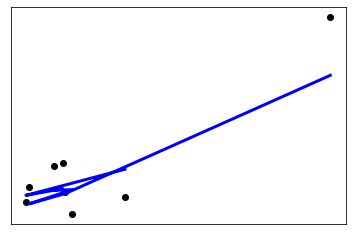

nbo_fk0


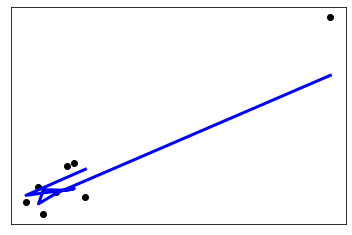

MaxAbsEStateIndex


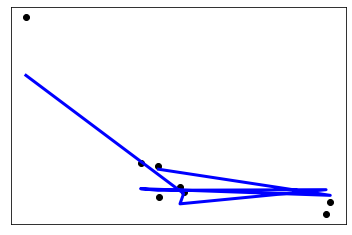

MaxEStateIndex


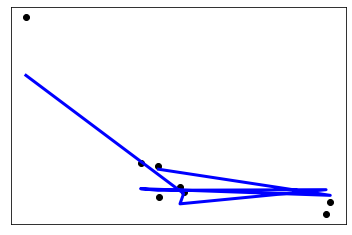

MinAbsEStateIndex


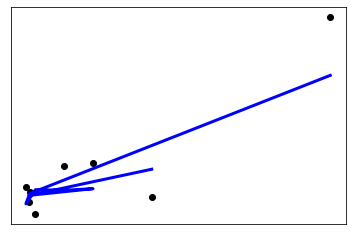

MinEStateIndex


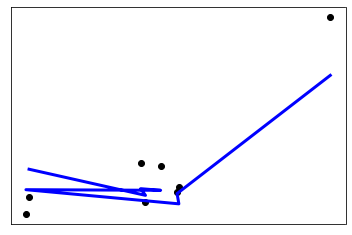

BalabanJ


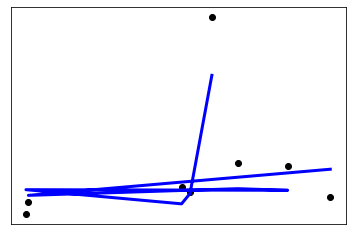

BertzCT


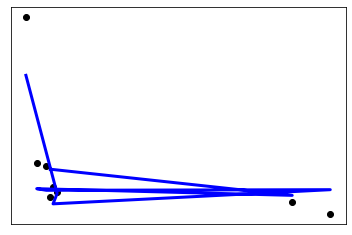

Chi0


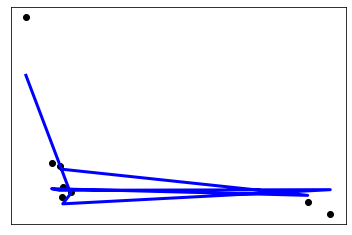

Chi0n


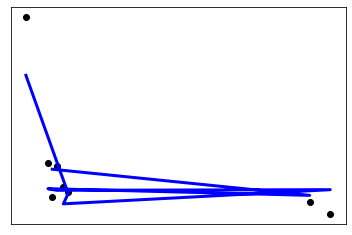

Chi0v


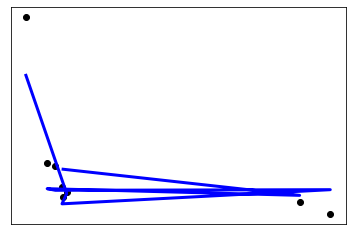

Chi1


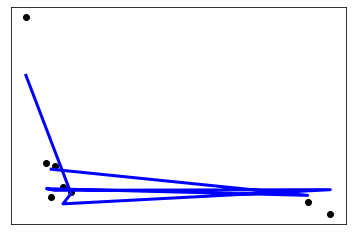

Chi1n


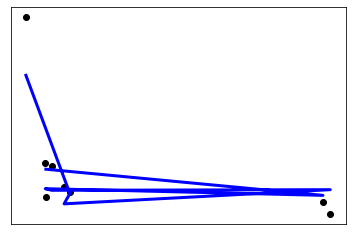

Chi1v


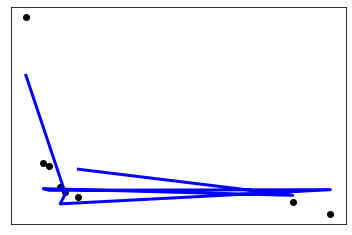

Chi2n


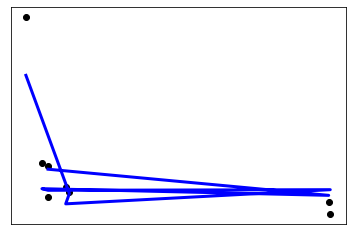

Chi2v


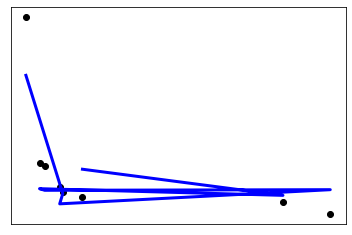

Chi3n


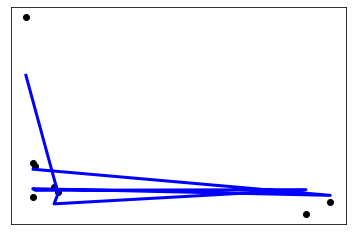

Chi3v


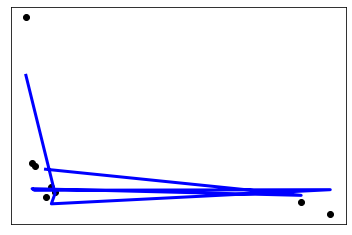

Chi4n


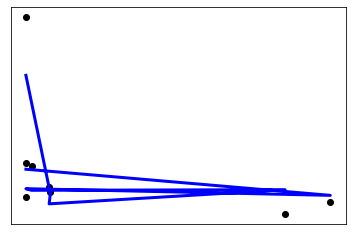

Chi4v


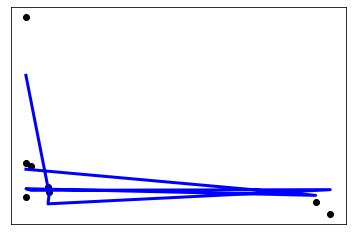

HallKierAlpha


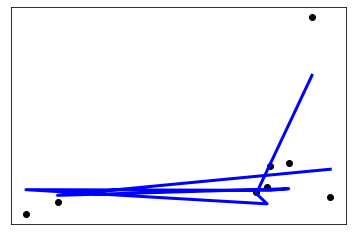

Ipc


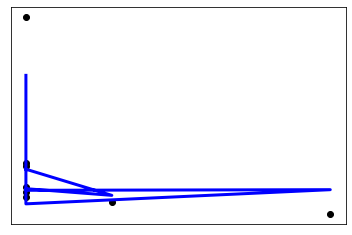

Kappa1


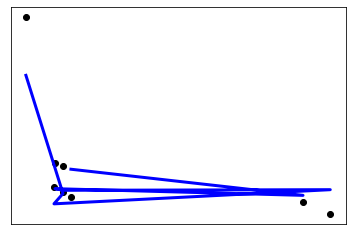

Kappa2


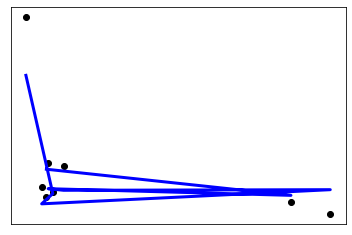

Kappa3


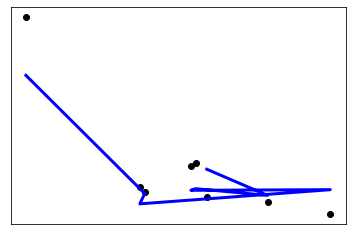

hallKierAlphas


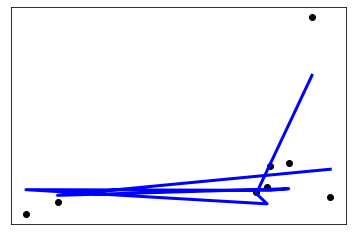

LabuteASA


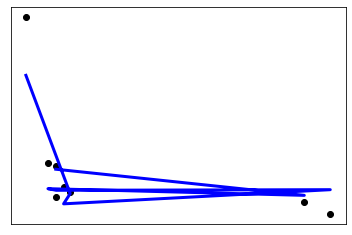

PEOE_VSA1


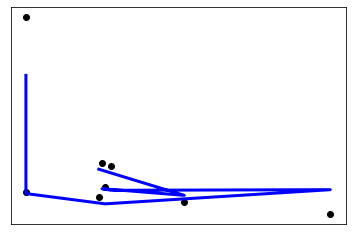

PEOE_VSA10


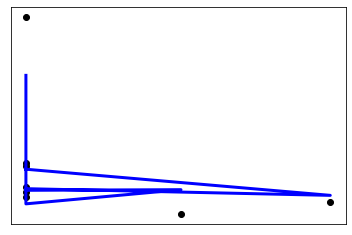

PEOE_VSA11


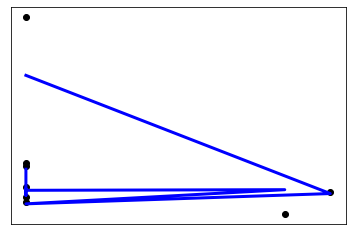

PEOE_VSA12


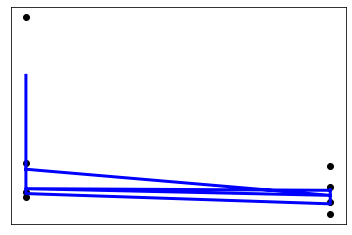

PEOE_VSA13


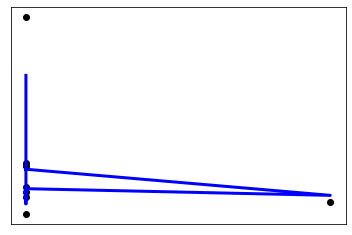

PEOE_VSA14


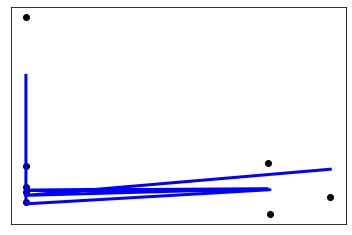

PEOE_VSA2


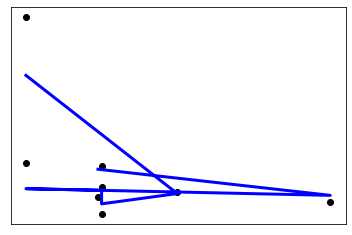

PEOE_VSA3


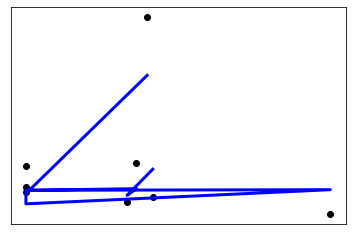

PEOE_VSA4


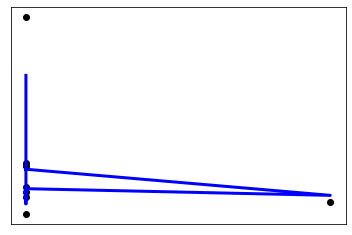

PEOE_VSA5


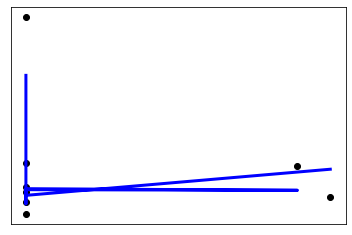

PEOE_VSA6


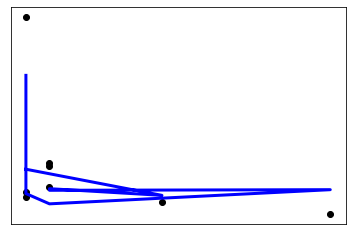

PEOE_VSA7


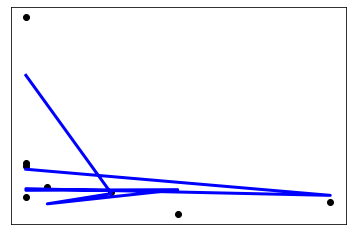

PEOE_VSA8


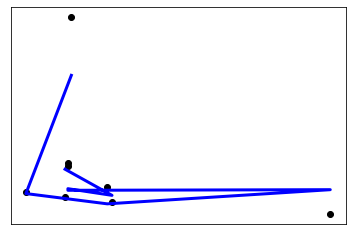

PEOE_VSA9


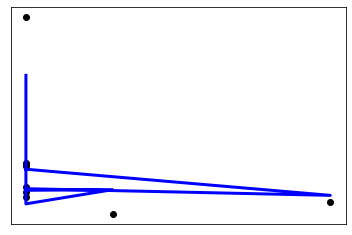

SMR_VSA1


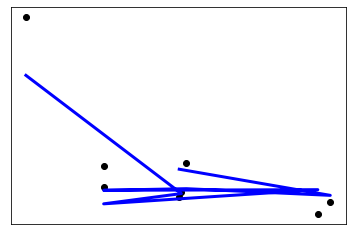

SMR_VSA10


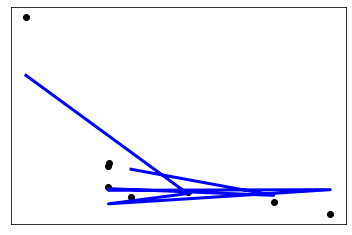

SMR_VSA2


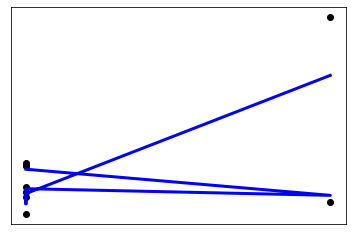

SMR_VSA3


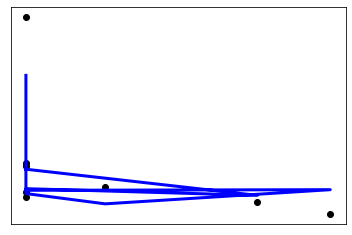

SMR_VSA4


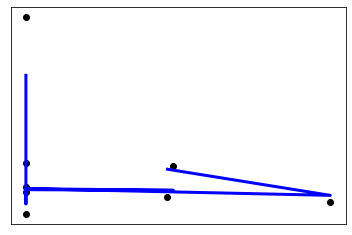

SMR_VSA5


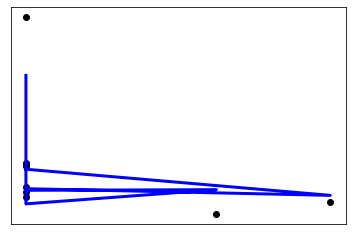

SMR_VSA6


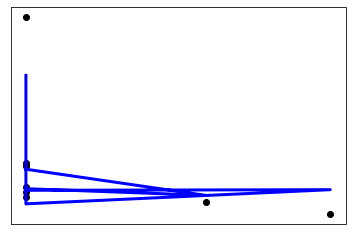

SMR_VSA7


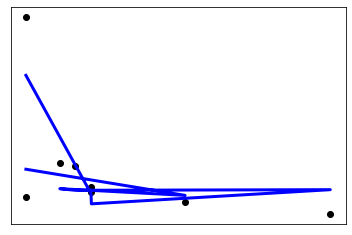

SMR_VSA8


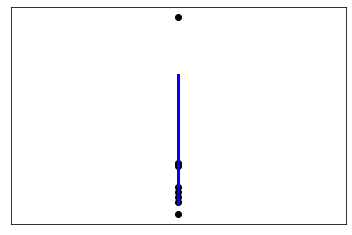

SMR_VSA9


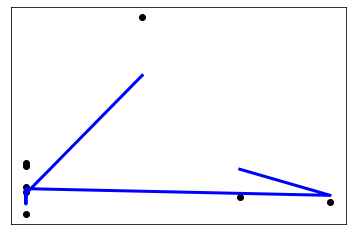

SlogP_VSA1


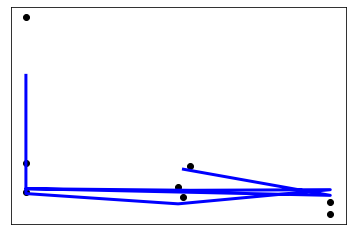

SlogP_VSA10


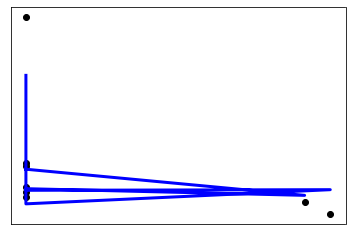

SlogP_VSA11


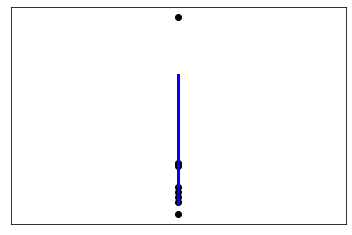

SlogP_VSA12


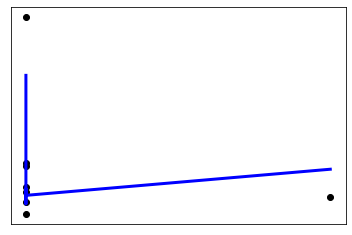

SlogP_VSA2


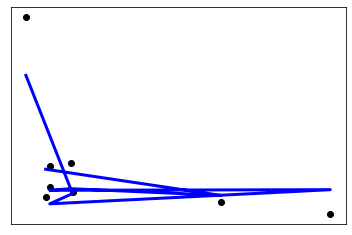

SlogP_VSA3


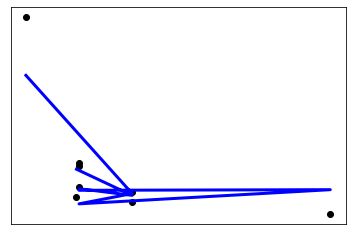

SlogP_VSA4


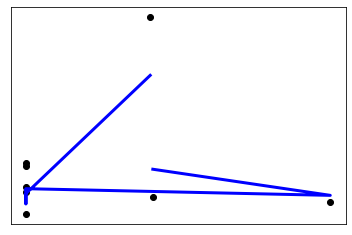

SlogP_VSA5


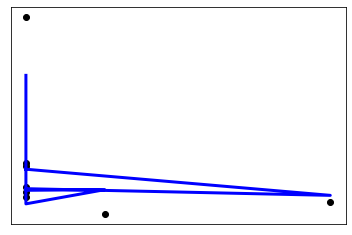

SlogP_VSA6


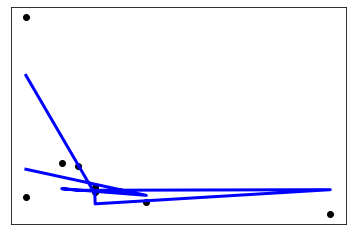

SlogP_VSA7


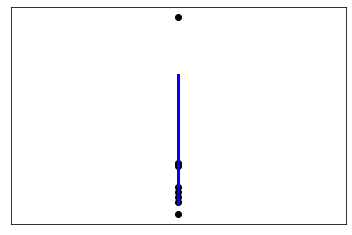

SlogP_VSA8


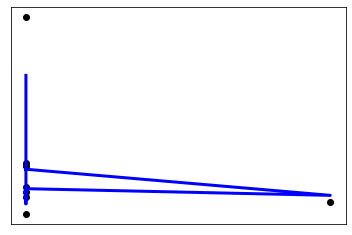

SlogP_VSA9


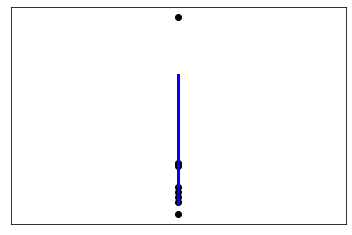

fr_Al_COO


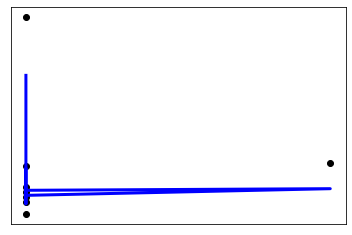

fr_Al_OH


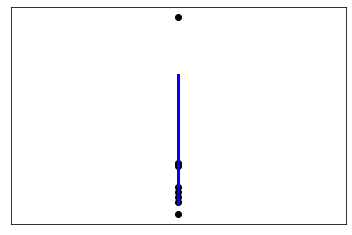

fr_Al_OH_noTert


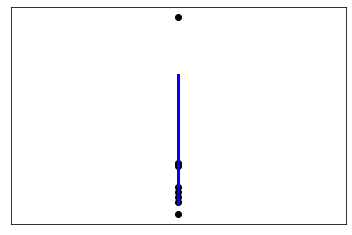

fr_ArN


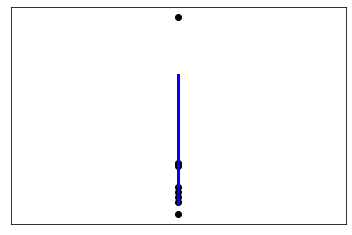

fr_Ar_COO


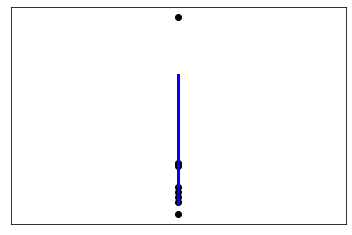

fr_Ar_N


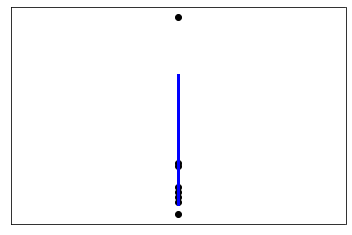

fr_Ar_NH


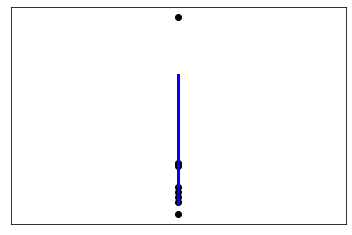

fr_Ar_OH


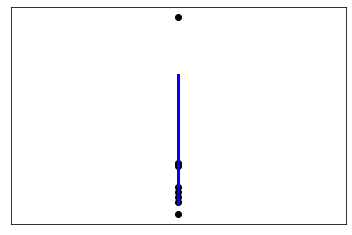

fr_COO


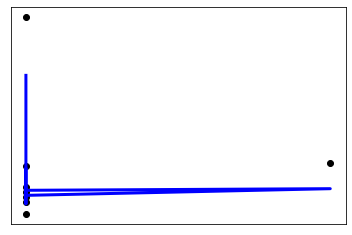

fr_COO2


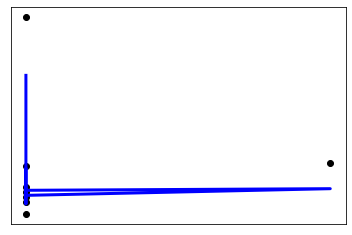

fr_C_O


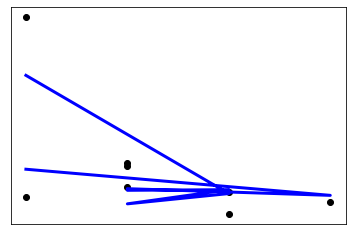

fr_C_O_noCOO


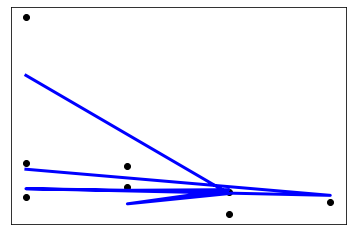

fr_C_S


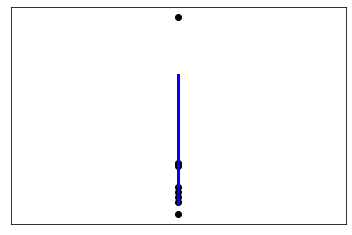

fr_HOCCN


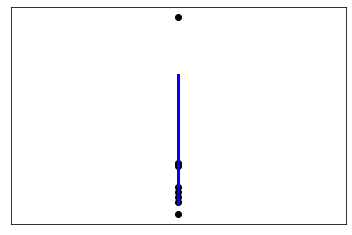

fr_Imine


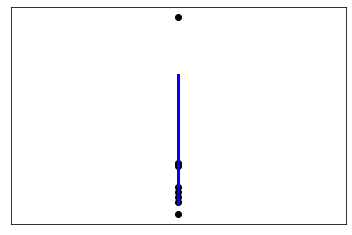

fr_NH0


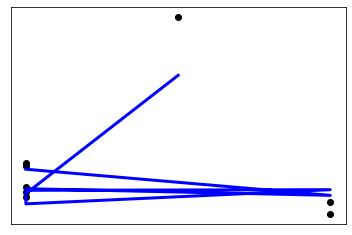

fr_NH1


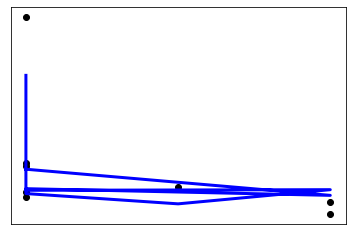

fr_NH2


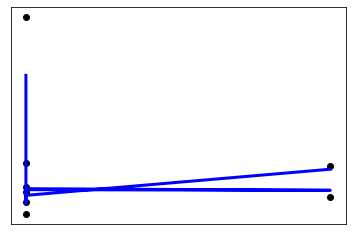

fr_N_O


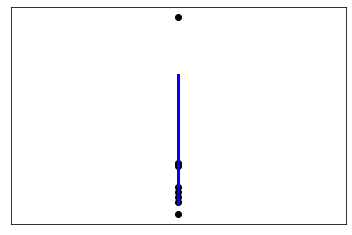

fr_Ndealkylation1


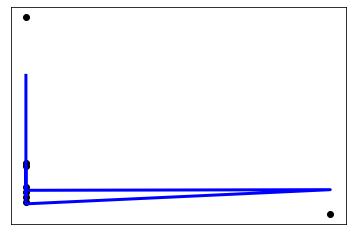

fr_Ndealkylation2


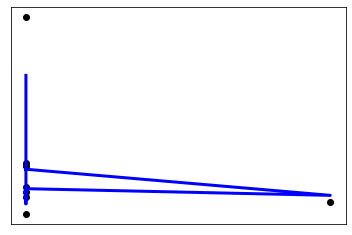

fr_Nhpyrrole


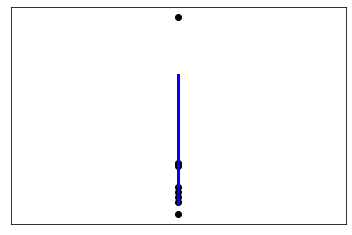

fr_SH


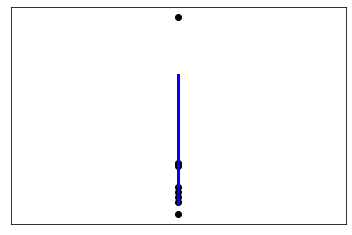

fr_aldehyde


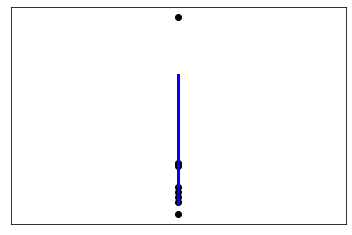

fr_alkyl_carbamate


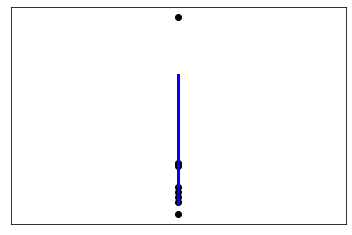

fr_alkyl_halide


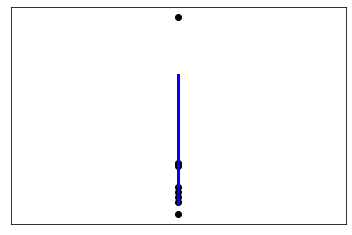

fr_allylic_oxid


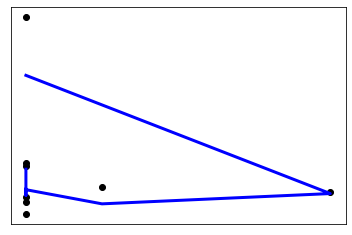

fr_amide


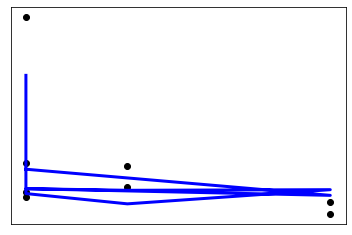

fr_amidine


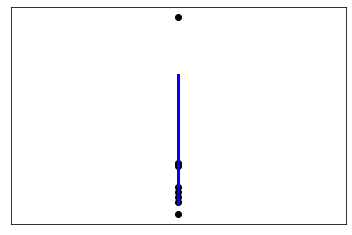

fr_aniline


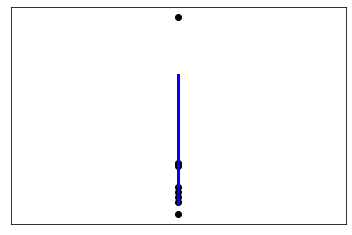

fr_aryl_methyl


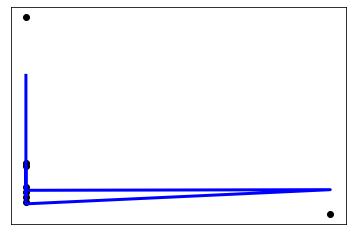

fr_azide


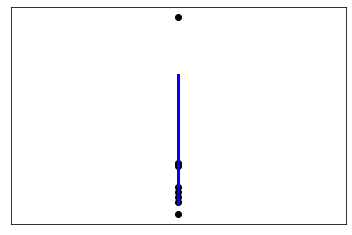

fr_azo


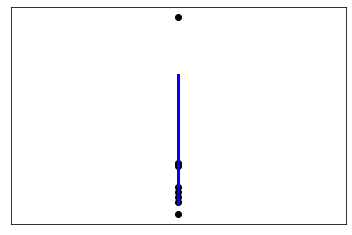

fr_barbitur


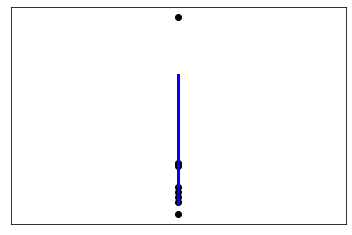

fr_benzene


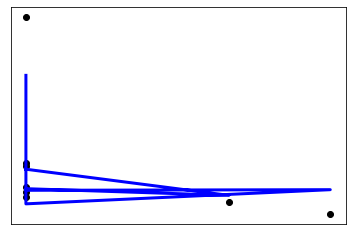

fr_benzodiazepine


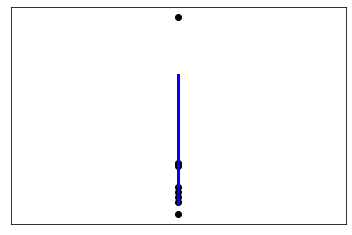

fr_bicyclic


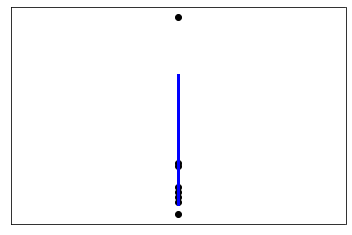

fr_diazo


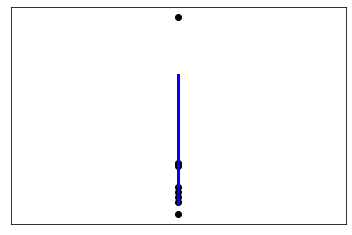

fr_dihydropyridine


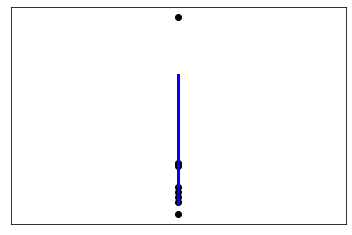

fr_epoxide


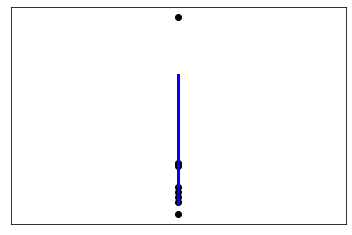

fr_ester


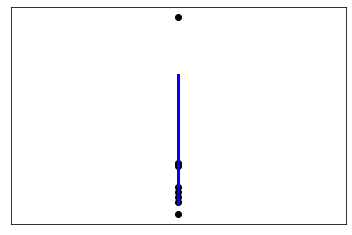

fr_ether


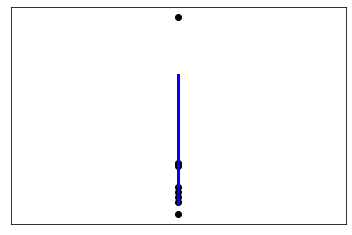

fr_furan


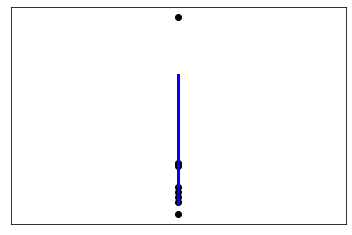

fr_guanido


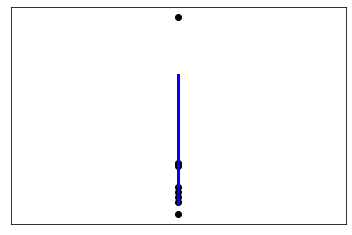

fr_halogen


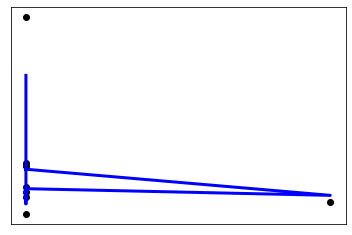

fr_hdrzine


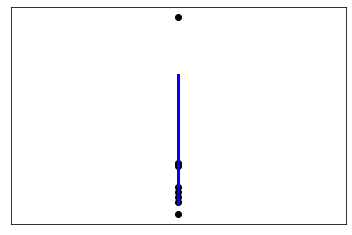

fr_hdrzone


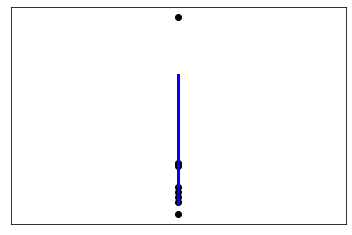

fr_imidazole


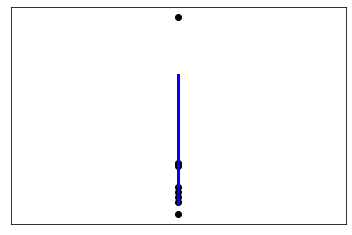

fr_imide


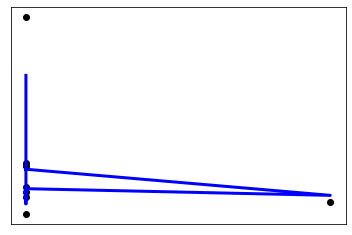

fr_isocyan


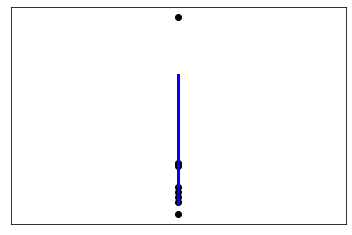

fr_isothiocyan


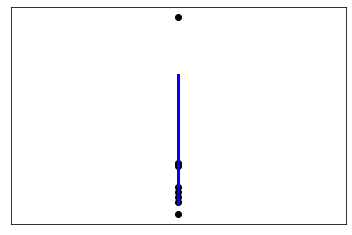

fr_ketone


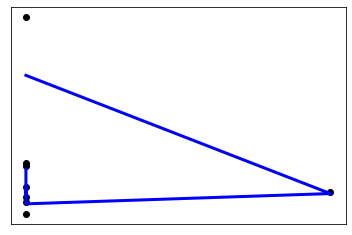

fr_ketone_Topliss


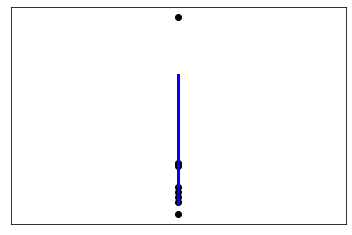

fr_lactam


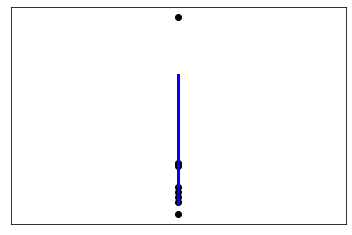

fr_lactone


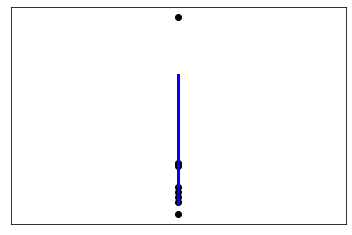

fr_methoxy


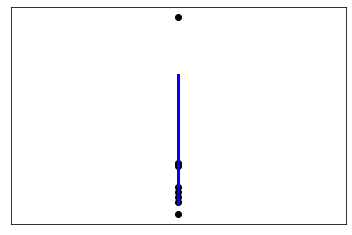

fr_morpholine


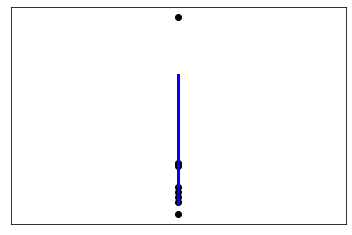

fr_nitrile


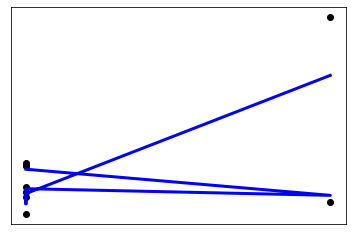

fr_nitro


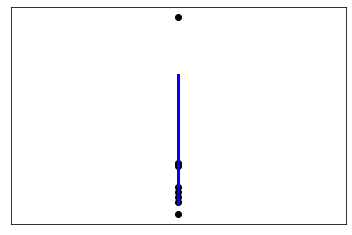

fr_nitro_arom


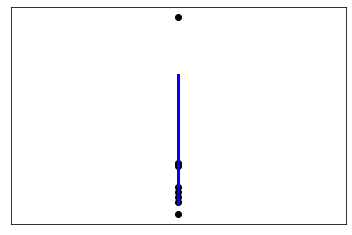

fr_nitro_arom_nonortho


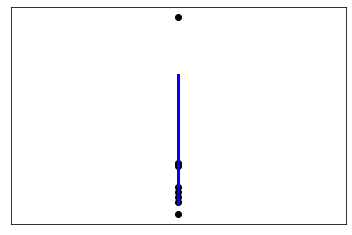

fr_nitroso


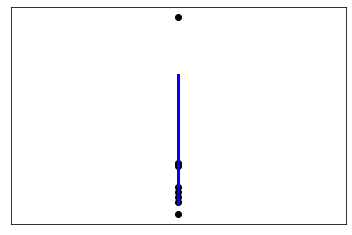

fr_oxazole


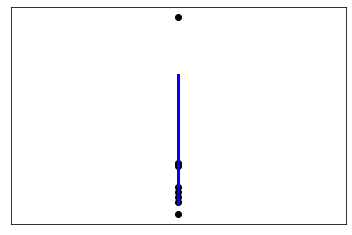

fr_oxime


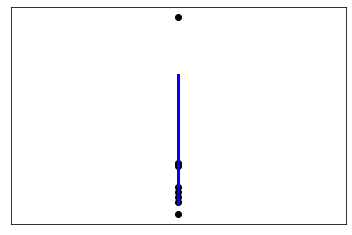

fr_para_hydroxylation


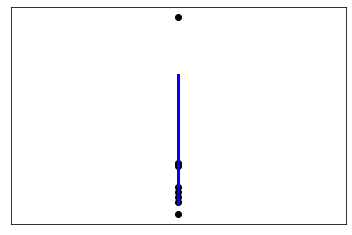

fr_phenol


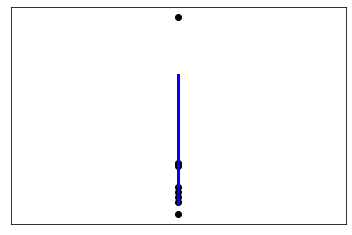

fr_phenol_noOrthoHbond


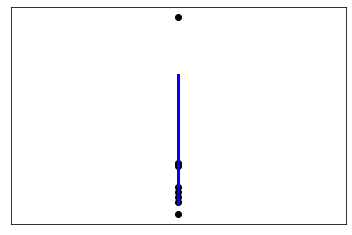

fr_phos_acid


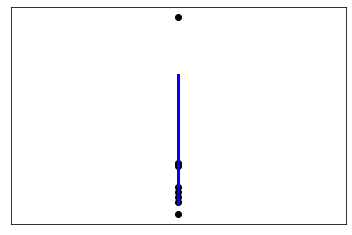

fr_phos_ester


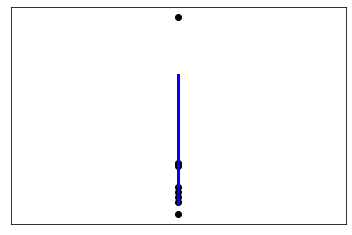

fr_piperdine


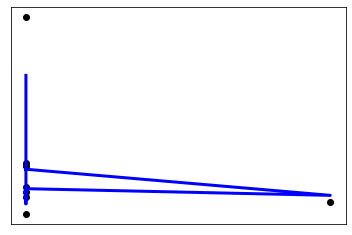

fr_piperzine


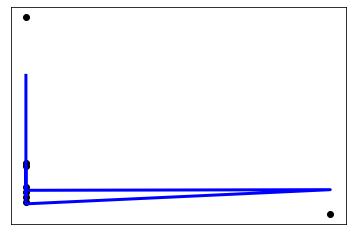

fr_priamide


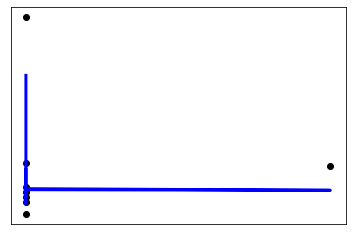

fr_prisulfonamd


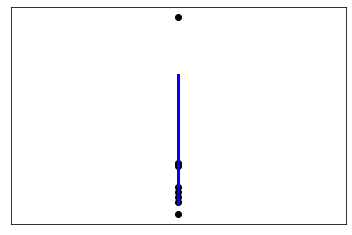

fr_pyridine


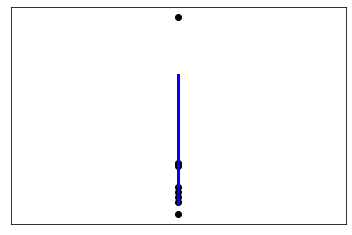

fr_quatN


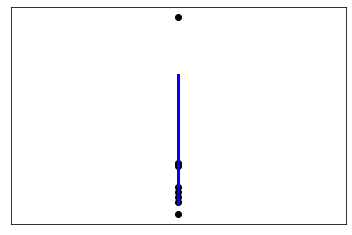

fr_sulfide


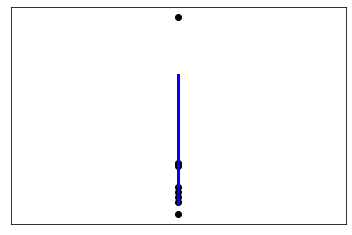

fr_sulfonamd


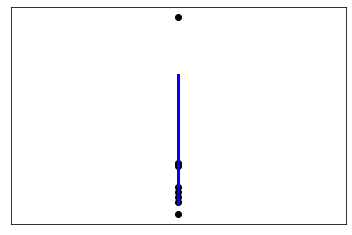

fr_sulfone


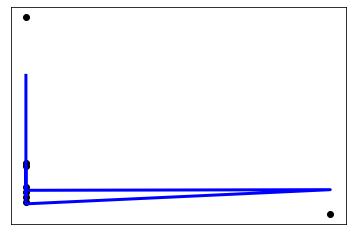

fr_term_acetylene


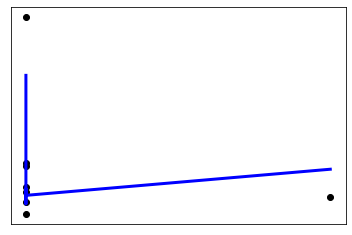

fr_tetrazole


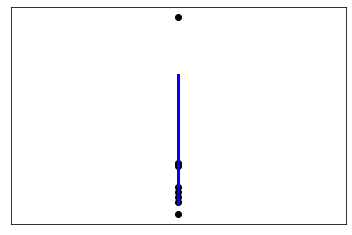

fr_thiazole


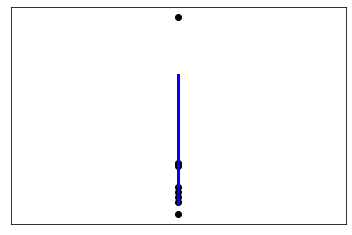

fr_thiocyan


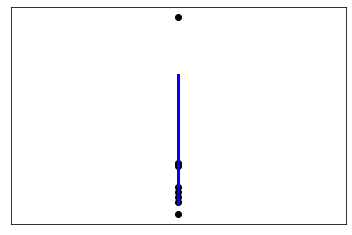

fr_thiophene


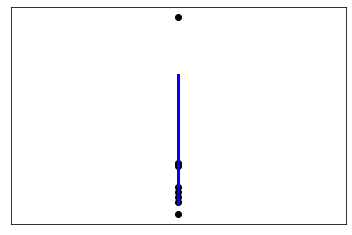

fr_unbrch_alkane


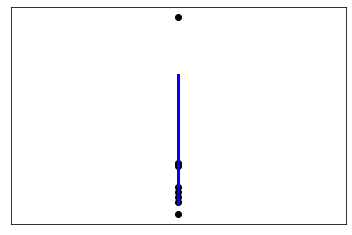

fr_urea


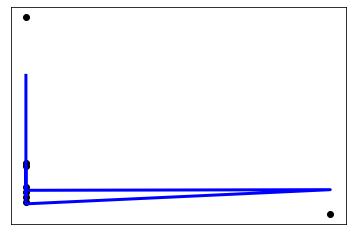

lin_NumHDonors


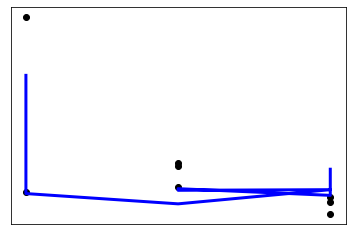

lin_NumHAcceptors


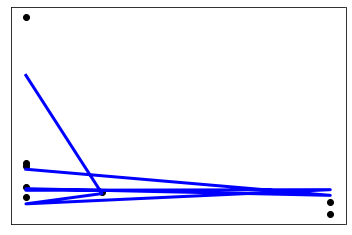

lin_FractionCSP3


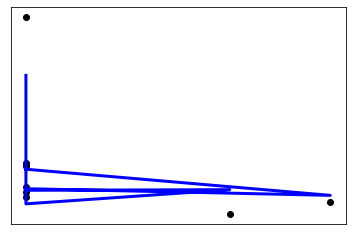

lin_HeavyAtomCount


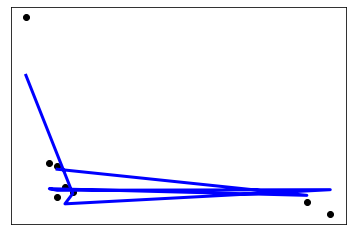

lin_NHOHCount


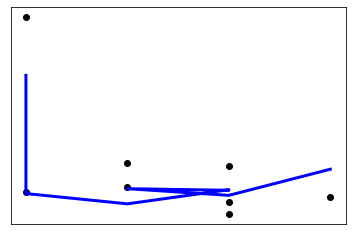

lin_NOCount


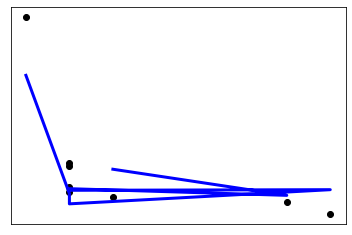

lin_NumAliphaticCarbocycles


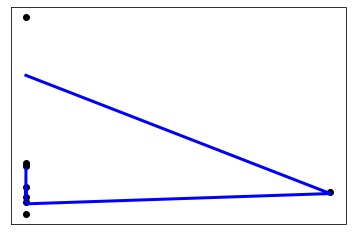

lin_NumAliphaticHeterocycles


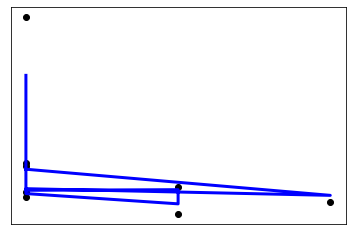

lin_NumAliphaticRings


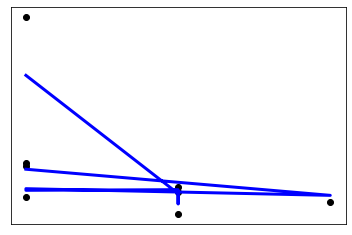

lin_NumAromaticCarbocycles


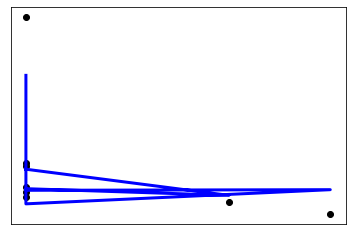

lin_NumAromaticHeterocycles


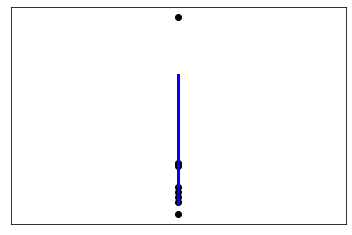

lin_NumHeteroatoms


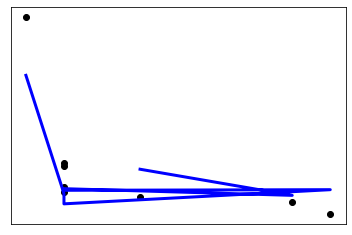

lin_NumSaturatedCarbocycles


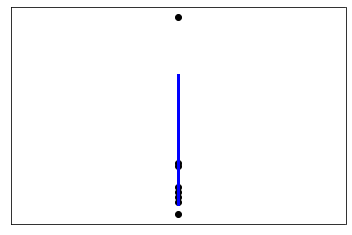

lin_NumSaturatedHeterocycles


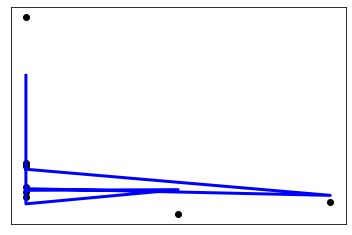

lin_NumSaturatedRings


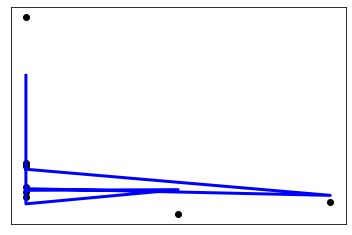

lin_RingCount


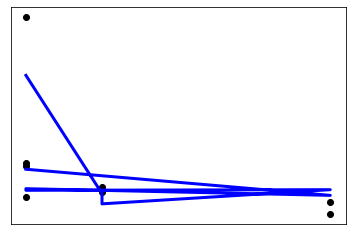

molwt


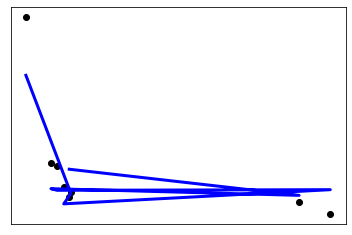

MolMR


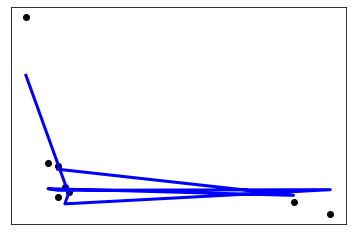

MaxAbsPartialCharge


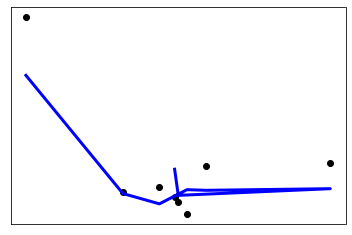

NumRadicalElectrons


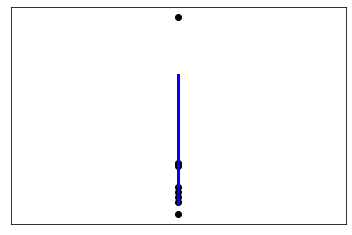

MinPartialCharge


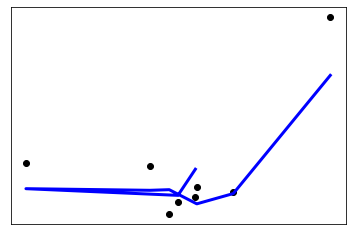

ExactMolWt


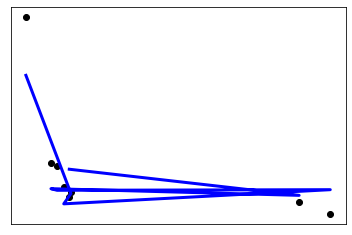

NumValenceElectrons


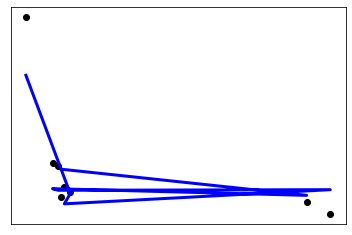

HeavyAtomMolWt


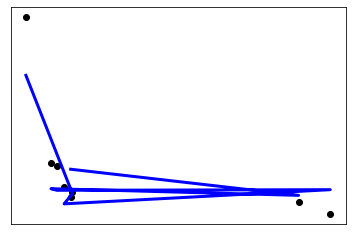

FpDensityMorgan1


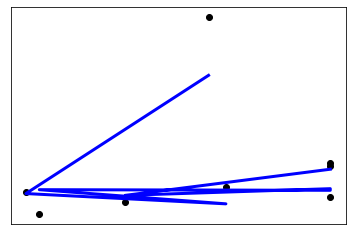

FpDensityMorgan2


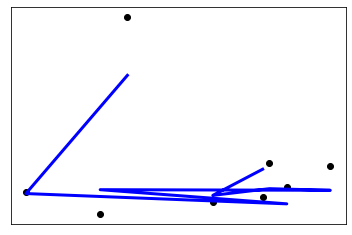

FpDensityMorgan3


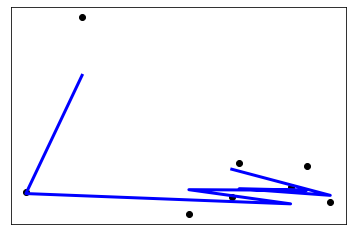

MolLogP


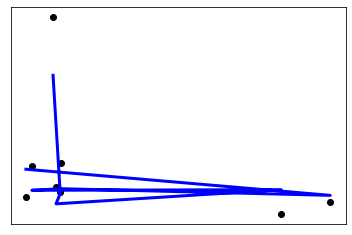

aromatic_ring


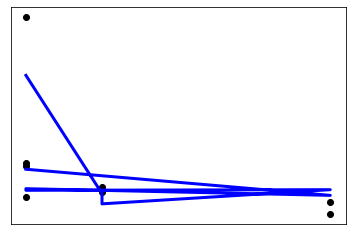

TPSA


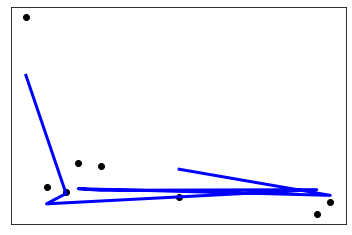

NumHeavyAtoms


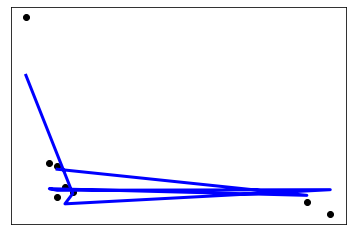

qed


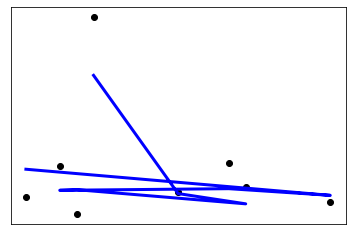

In [341]:
for prop in normalized_x_test.columns.tolist():
    plt.scatter(normalized_x_test[prop], Y_test, color="black")
    plt.plot(normalized_x_test[prop], regr.predict(normalized_x_test), color="blue", linewidth=3)
    print(prop)
    plt.xticks(())
    plt.yticks(())

    plt.show()

In [300]:
reg = linear_model.LinearRegression()
reg.fit(normalized_x_train, Y_train)
#reg.predict(X_test)
print(score_reg(Y_test, reg.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, reg.predict(normalized_x_test))

[0.14669119337790393, 0.1811558554160937, 0.24648007213550754, 0.10628061553455574, 0.016434510340453394]


In [301]:
bas = linear_model.BayesianRidge()
bas.fit(normalized_x_train, Y_train)
#bas.predict(X_test)
print(score_reg(Y_test, bas.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, bas.predict(normalized_x_test))

[0.7659871636241854, 0.7938335202712801, 0.10851785488178756, 0.055742309549278404, 0.004507027642714083]


In [302]:
las = linear_model.Lasso(alpha=0.1)
las.fit(normalized_x_train, Y_train)
print(score_reg(Y_test, las.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, las.predict(normalized_x_test))

[0.2192990117358936, 0.2656069998401629, 0.269967496574427, 0.09735623517217046, 0.01503610224675771]


In [303]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=2, random_state=4)
clf = clf.fit(normalized_x_train, Y_train)
print(score_reg(Y_test, clf.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, clf.predict(normalized_x_test))

[0.4670787679046956, 0.6097634605812917, 0.22038555555555556, 0.0791177525252525, 0.010263927234254153]


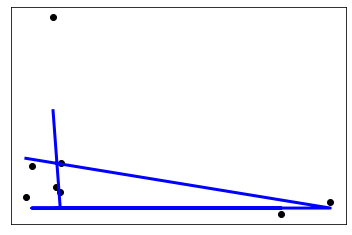

In [335]:
plt.scatter(normalized_x_test['MolLogP'], Y_test, color="black")
plt.plot(normalized_x_test['MolLogP'], clf.predict(normalized_x_test), color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [304]:
regr = RandomForestRegressor(max_depth=3, random_state=2)
regr.fit(normalized_x_train, Y_train)
print(score_reg(Y_test, regr.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, regr.predict(normalized_x_test))

[0.7709726742908014, 0.7912865563125795, 0.13748759449633707, 0.054745729672391545, 0.004411007976718503]


In [260]:
data_new

,NAME,SMILES,nbo_fk+,nbo_fk-,nbo_fk0
0,k777,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,-0.00152,0.08531,0.041895
1,odn,CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O...,-0.01238,-0.00889,-0.010635
2,k777_c,N#Cc1cc(C(=O)N2CC3C4CCN3CC2C4c2ccc(CC(=O)NCC(=...,0.03462,0.00000,0.017310
3,k777_d,C#CC1CCCN1C(=O)CC(=O)NC(Cc1cc(Br)c2occc2c1)C(=...,0.18625,0.01243,0.099340
4,k777_f,CC(C)C1NC(=O)C(Cc2ccccc2)N(C)C(=O)C(C(C)C)NC=C...,0.58068,0.04039,0.310535
5,odn_a,COC(=O)NC(Cc1ccccc1)C(Cc1ccc(Cl)cc1)NC(CC(C)C)...,0.03085,0.02618,0.028515
6,odn_c,CCC1CCN(C(=O)C(CCCC2CCNCC2)NC(=O)c2cc(-c3cccc(...,0.02761,-0.00159,0.013010
7,odn_f,N#CC1(NC(=O)C2CCCN2Cc2ccc(-c3c[nH]c(=NC(=O)CC4...,0.10056,0.11756,0.109060
8,odn_g,N#Cc1cccc(-c2c(-c3cc(F)cc(C#CCO)c3)cc(F)c(C3(C...,0.10321,0.03908,0.071145


In [305]:
score

,R2_Score,VE,ERM,EMA,EQM
0,0.145203,0.354998,0.206224,0.112270,0.016463
1,0.146691,0.181156,0.246480,0.106281,0.016435
2,0.765987,0.793834,0.108518,0.055742,0.004507
3,0.219299,0.265607,0.269967,0.097356,0.015036
4,0.467079,0.609763,0.220386,0.079118,0.010264
5,0.770973,0.791287,0.137488,0.054746,0.004411


In [306]:
score.round(4).to_csv("score_table.csv", index=False)

In [59]:
X = df.iloc[:,4:]
y = df.iloc[:,3]

In [60]:
# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.20, random_state=3)

scaler = StandardScaler()

normalized_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)
normalized_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

In [92]:
Y_odn_k777 = X_odn_k777.iloc[:, 0]
X_odn_k777 = X_odn_k777.iloc[:, 1:]

In [99]:
X_odn_k777_norm = pd.DataFrame(scaler.transform(X_odn_k777), columns=X_odn_k777.columns)

In [63]:
score = pd.DataFrame(columns=['R2_Score', 'VE', 'ERM', 'EMA', 'EQM'])

In [101]:
regr = svm.SVR()
regr.fit(normalized_x_train, Y_train)
print(score_reg(Y_test, regr.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, regr.predict(normalized_x_test))

[0.384084791237969, 0.3963013872930288, 0.22861641762979956, 0.1187015220326666, 0.01755723704888162]


In [102]:
score_reg(Y_odn_k777, regr.predict(X_odn_k777_norm))

[-0.04006866167195522,
 0.0,
 0.42914858560787533,
 0.13795967466229148,
 0.031576379960565844]

In [103]:
reg = linear_model.LinearRegression()
reg.fit(normalized_x_train, Y_train)
#reg.predict(X_test)
print(score_reg(Y_test, reg.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, reg.predict(normalized_x_test))

[0.48202284782686533, 0.8458915348390424, 0.23248647382549037, 0.10184505900178224, 0.014765421469113398]


In [104]:
score_reg(Y_odn_k777, reg.predict(X_odn_k777_norm))

[-16148841299.93247,
 -11366180932.955883,
 63194.11780436536,
 12049.941398698073,
 490277197.6817382]

In [105]:
bas = linear_model.BayesianRidge()
bas.fit(normalized_x_train, Y_train)
#bas.predict(X_test)
print(score_reg(Y_test, bas.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, bas.predict(normalized_x_test))

[0.6113006465275237, 0.6116051554421436, 0.1465760805711912, 0.09086457297598749, 0.011080237332311187]


In [106]:
score_reg(Y_odn_k777, bas.predict(X_odn_k777_norm))

[-94640736488.3451,
 -66613130740.05722,
 152984.24171140362,
 29170.45237159886,
 2873283241.0615544]

In [107]:
las = linear_model.Lasso(alpha=0.1)
las.fit(normalized_x_train, Y_train)
print(score_reg(Y_test, las.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, las.predict(normalized_x_test))

[0.04264165246348928, 0.1316830177166587, 0.29895663146447793, 0.13841625321499657, 0.027290391939190417]


In [108]:
score_reg(Y_odn_k777, las.predict(X_odn_k777_norm))

[0.060246643839098724,
 0.06902600808401282,
 0.4315409385664597,
 0.12369875323527735,
 0.02853081737474075]

In [109]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=6, random_state=2)
clf = clf.fit(normalized_x_train, Y_train)
print(score_reg(Y_test, clf.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, clf.predict(normalized_x_test))

[0.8548834038360204, 0.8836621213485879, 0.11993999999999999, 0.04862999999999999, 0.00413668382]


In [110]:
score_reg(Y_odn_k777, clf.predict(X_odn_k777_norm))

[0.4308728192287954,
 0.48749434193745234,
 0.34885,
 0.08249888888888882,
 0.01727864396666666]

In [111]:
regr = RandomForestRegressor(max_depth=3, random_state=4)
regr.fit(normalized_x_train, Y_train)
print(score_reg(Y_test, regr.predict(normalized_x_test)))
score.loc[len(score)]= score_reg(Y_test, regr.predict(normalized_x_test))

[0.849462178058898, 0.8495008908151507, 0.09645719226190469, 0.05556799145238097, 0.004291220913272558]


In [ ]:
print(Y_odn_k777, regr.predict(X_odn_k777_norm))

0   -0.00152
1   -0.01238
2    0.03462
3    0.18625
4    0.58068
5    0.03085
6    0.02761
7    0.10056
8    0.10321
Name: nbo_fk+, dtype: float64 [0.05074442 0.04797868 0.04719334 0.09090487 0.19487448 0.05071842
 0.04694606 0.11313077 0.04322416]


In [ ]:
score_reg(Y_odn_k777, regr.predict(X_odn_k777_norm))

[0.3815146144943836,
 0.43544215257143226,
 0.3858055230952381,
 0.07978979843915346,
 0.01877715409806486]

In [121]:
score

,R2_Score,VE,ERM,EMA,EQM
0,0.384085,0.396301,0.228616,0.118702,0.017557
1,0.482023,0.845892,0.232486,0.101845,0.014765
2,0.611301,0.611605,0.146576,0.090865,0.011080
3,0.042642,0.131683,0.298957,0.138416,0.027290
4,0.854883,0.883662,0.119940,0.048630,0.004137
5,0.849462,0.849501,0.096457,0.055568,0.004291
6,0.384085,0.396301,0.228616,0.118702,0.017557
7,0.482023,0.845892,0.232486,0.101845,0.014765
8,0.611301,0.611605,0.146576,0.090865,0.011080
9,0.042642,0.131683,0.298957,0.138416,0.027290


In [71]:
#score.round(4).to_csv("score_table.csv", index=False)

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
import sklearn

In [74]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [75]:
cross_val_score(regr, X,y, cv=5, scoring='explained_variance')

array([ 0.51642355,  0.52289968,  0.40345955,  0.64642428, -0.08052724])